In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from datetime import datetime

from matplotlib.lines import Line2D

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [22]:
tracker = pickle.load(open(f'tweets/tweets_tracker.txt', 'rb'))
tracker

{'california': {'max_id': 1241540334410137603,
  'downloaded': 429513,
  'tweetLocation': '36.116,-119.682,300mi'},
 'colorado': {'max_id': 1241537123749990400,
  'downloaded': 41088,
  'tweetLocation': '39.060,-105.311,200mi'},
 'florida': {'max_id': 1241548946062880768,
  'downloaded': 148567,
  'tweetLocation': '27.766,-81.687,225mi'},
 'georgia': {'max_id': 1241551890954977281,
  'downloaded': 137930,
  'tweetLocation': '32.781,-83.334,150mi'},
 'idaho': {'max_id': 1241513089557618688,
  'downloaded': 9493,
  'tweetLocation': '44.241,-114.479,200mi'},
 'illinois': {'max_id': 1241557440681910273,
  'downloaded': 190732,
  'tweetLocation': '40.350,-88.986,150mi'},
 'louisiana': {'max_id': 1241554798308216832,
  'downloaded': 73430,
  'tweetLocation': '31.170,-91.868,150mi'},
 'massachusetts': {'max_id': 1241559391960289280,
  'downloaded': 136352,
  'tweetLocation': '42.230,-71.530,100mi'},
 'newyork': {'max_id': 1241567743842947074,
  'downloaded': 430184,
  'tweetLocation': '40.700

In [19]:
df = pd.read_csv(f'tweets/tweets_processed/coronavirus_california_tweets_processed', engine = 'python')

In [27]:
df.head

,id_str,created_at,full_text,possibly_sensitive,display_text_range,favorite_count,retweet_count,character_count,hashtags_count,symbols_count,urls_count,user_mentions_count,processed_text,sentiment_distribution,sentiment
0,1241541889544708096,2020-03-22 01:47:07+00:00,Good Evening everyone! Tomorrow at 7:00 A.M. P...,NaN,"[0, 269]",0,0,269,0,0,0,0,good evening everyone tomorrow pacific standar...,"{'neg': 0.049, 'neu': 0.845, 'pos': 0.106, 'co...",0.5229


In [29]:
df['date'] = df['created_at'].apply(lambda x: datetime.strptime(x[:10], '%Y-%m-%d'))

In [37]:
dates = df.groupby(['date'])['sentiment'].mean().keys().tolist()
average_sentiment = df.groupby(['date'])['sentiment'].mean().tolist()

In [223]:
dates

[Timestamp('2020-03-09 00:00:00'),
 Timestamp('2020-03-10 00:00:00'),
 Timestamp('2020-03-11 00:00:00'),
 Timestamp('2020-03-12 00:00:00'),
 Timestamp('2020-03-13 00:00:00'),
 Timestamp('2020-03-14 00:00:00'),
 Timestamp('2020-03-15 00:00:00'),
 Timestamp('2020-03-16 00:00:00'),
 Timestamp('2020-03-17 00:00:00'),
 Timestamp('2020-03-18 00:00:00'),
 Timestamp('2020-03-19 00:00:00'),
 Timestamp('2020-03-20 00:00:00'),
 Timestamp('2020-03-21 00:00:00'),
 Timestamp('2020-03-22 00:00:00')]

In [68]:
cases_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20'],
      dtype='object')

In [44]:
cases_df = pd.read_csv(f'tweets/time_series_19-covid-Confirmed.txt', engine = 'python')

In [77]:
state_cases = cases_df[cases_df['Province/State'] == 'California']
state_cases = state_cases.iloc[:,-len(dates):].transpose()
state_cases.columns = ['california']

In [81]:
state_cases = state_cases['california'].tolist()

* positive sentiment: compound score >= 0.05
* neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
* negative sentiment: compound score <= -0.05

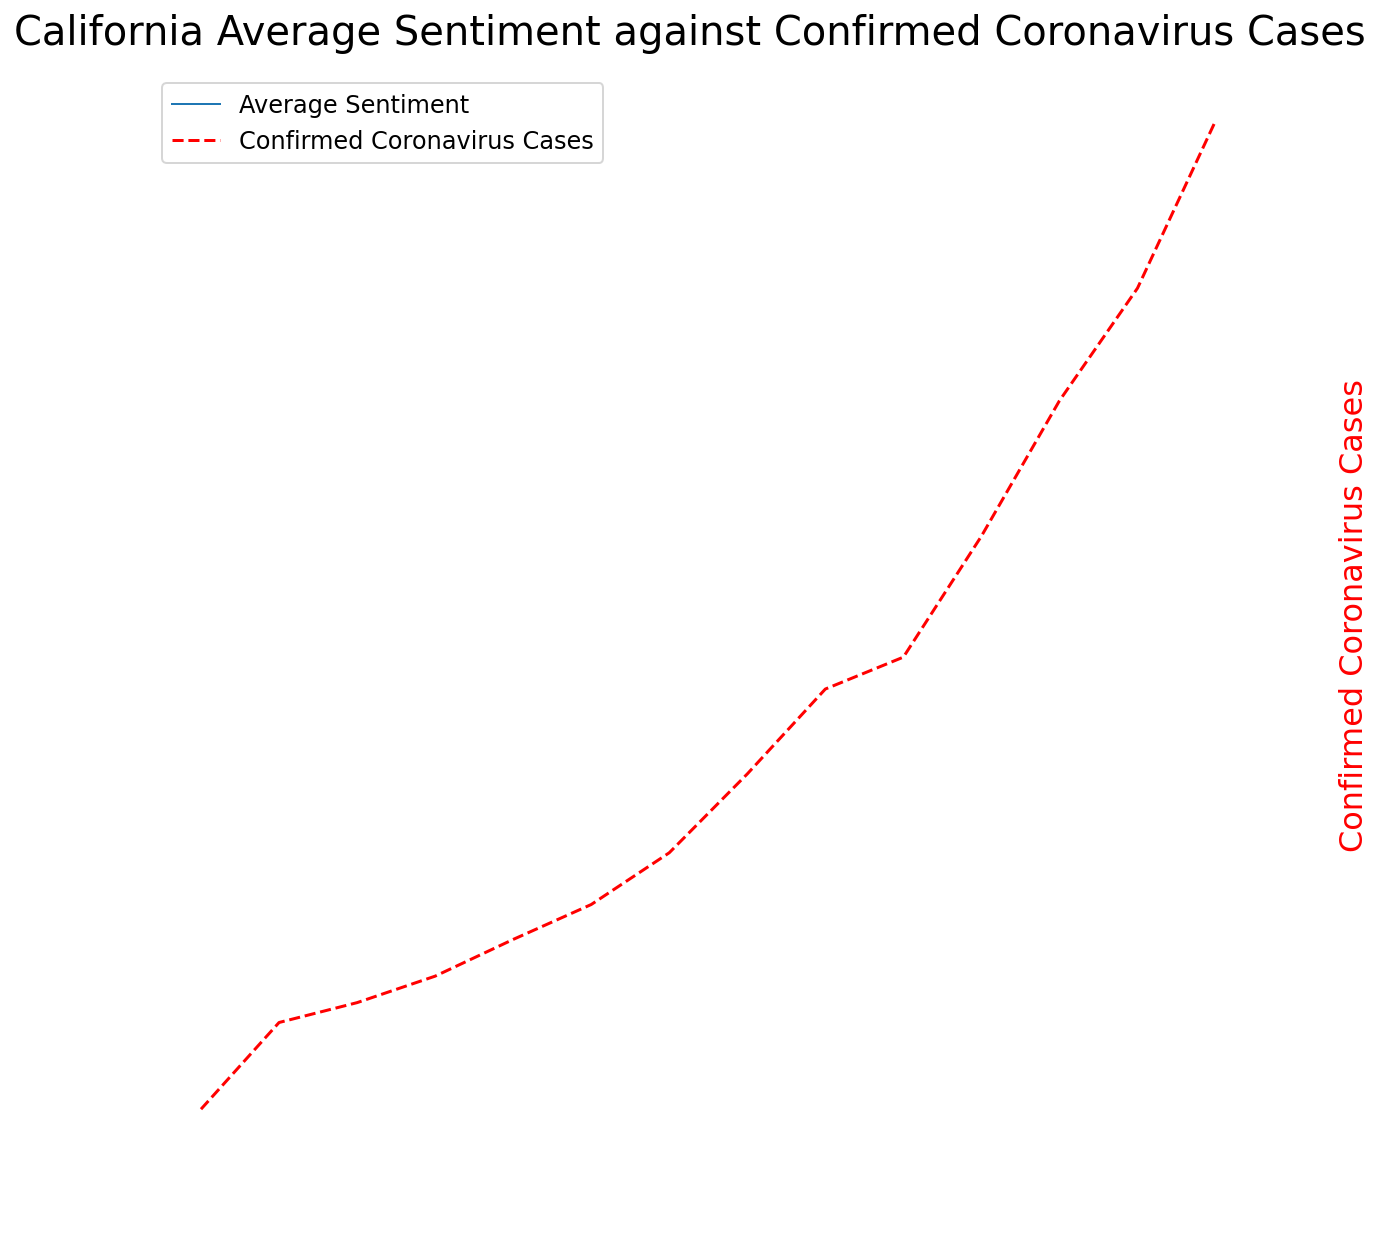

In [220]:
with plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white', 'ytick.color':'white', 'figure.facecolor':'white'}):
    fig = plt.figure(figsize=(10,10))
    fig.suptitle(f'California Average Sentiment against Confirmed Coronavirus Cases', fontsize=20, y=0.92)
    ax1 = fig.add_subplot(111)
    ax1.plot(dates, average_sentiment, color='w')
    ax1.set_ylabel('Average Sentiment Over Time', fontsize=16, color='w')
    ax1.set_xlabel('Date', fontsize=16, color='w')


    ax2 = ax1.twinx()
    ax2.plot(dates, state_cases, 'r-', linestyle='dashed')
    ax2.set_ylabel('Confirmed Coronavirus Cases', color='r', fontsize=16)
    for t1 in ax2.get_yticklabels():
        t1.set_color('w')

#     from matplotlib.lines import Line2D

#     ax1_line = Line2D([0], [0], lw=1, label='Average Sentiment')
#     ax2_line = Line2D([0], [0], color='r', lw=1.5, ls='--', label='Confirmed Coronavirus Cases')
#     plt.legend(handles=[ax1_line, ax2_line], fontsize=12, fancybox=True)

    plt.savefig('tweets/images/california_sentiment_vs_cases.png')

In [221]:
cases_df = pd.read_csv(f'tweets/time_series_19-covid-Confirmed.txt', engine = 'python')
cases_df['Province/State'] = cases_df['Province/State'].apply(lambda x:  x.replace(' ','') if type(x) == str else False)
cases_df['Province/State'] = cases_df['Province/State'].apply(lambda x:  x.lower() if type(x) == str else False)

def graphSentimentVsCases(state):
    df = pd.read_csv(f'tweets/tweets_processed/coronavirus_{state}_tweets_processed', engine = 'python')
    df = df[df['created_at'] != '0.0'] # if a created_at timestamp is not properly done, twitter has 0.0 filled in
    df['date'] = df['created_at'].apply(lambda x: datetime.strptime(x[:10], '%Y-%m-%d') if type(x) == str else '0.0')
    df = df[df['date'] != '0.0'] # if a created_at timestamp is not properly done, twitter has 0.0 filled in
    dates = df.groupby(['date'])['sentiment'].mean().keys().tolist()
    average_sentiment = df.groupby(['date'])['sentiment'].mean().tolist()

    state_cases = cases_df[cases_df['Province/State'] == state]
    state_cases = state_cases.iloc[:,-len(dates):].transpose()
    state_cases.columns = [state]
    state_cases = state_cases[state].tolist()
    
    with plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white', 'ytick.color':'white', 'figure.facecolor':'white'}):
        fig = plt.figure(figsize=(10,10))
        fig.suptitle(f'{state.capitalize()} Average Sentiment against Confirmed Coronavirus Cases', fontsize=20, y=0.92, color='w')
        ax1 = fig.add_subplot(111)
        ax1.plot(dates, average_sentiment, color='w')
        ax1.set_ylabel('Average Sentiment Over Time', fontsize=16, color='w')
        ax1.set_xlabel('Date', fontsize=16, color='w')

        ax2 = ax1.twinx()
        ax2.plot(dates, state_cases, 'r-', linestyle='dashed')
        ax2.set_ylabel('Confirmed Coronavirus Cases', color='r', fontsize=16)
        for t1 in ax2.get_yticklabels():
            t1.set_color('r')

#         ax1_line = Line2D([0], [0], lw=1, label='Average Sentiment')
#         ax2_line = Line2D([0], [0], color='r', lw=1.5, ls='--', label='Confirmed Coronavirus Cases')
#         plt.legend(handles=[ax1_line, ax2_line], fontsize=12, fancybox=True)
    
        plt.savefig(f'tweets/images/{state}_sentiment_vs_cases.png', transparent=True, bbox_inches='tight')
    print(f'Saved graph for {state}!')

Saved graph for california!
Saved graph for colorado!
Saved graph for florida!
Saved graph for georgia!
Saved graph for idaho!
Saved graph for illinois!
Saved graph for louisiana!
Saved graph for massachusetts!
Saved graph for newyork!
Saved graph for tennessee!
Saved graph for texas!
Saved graph for washington!


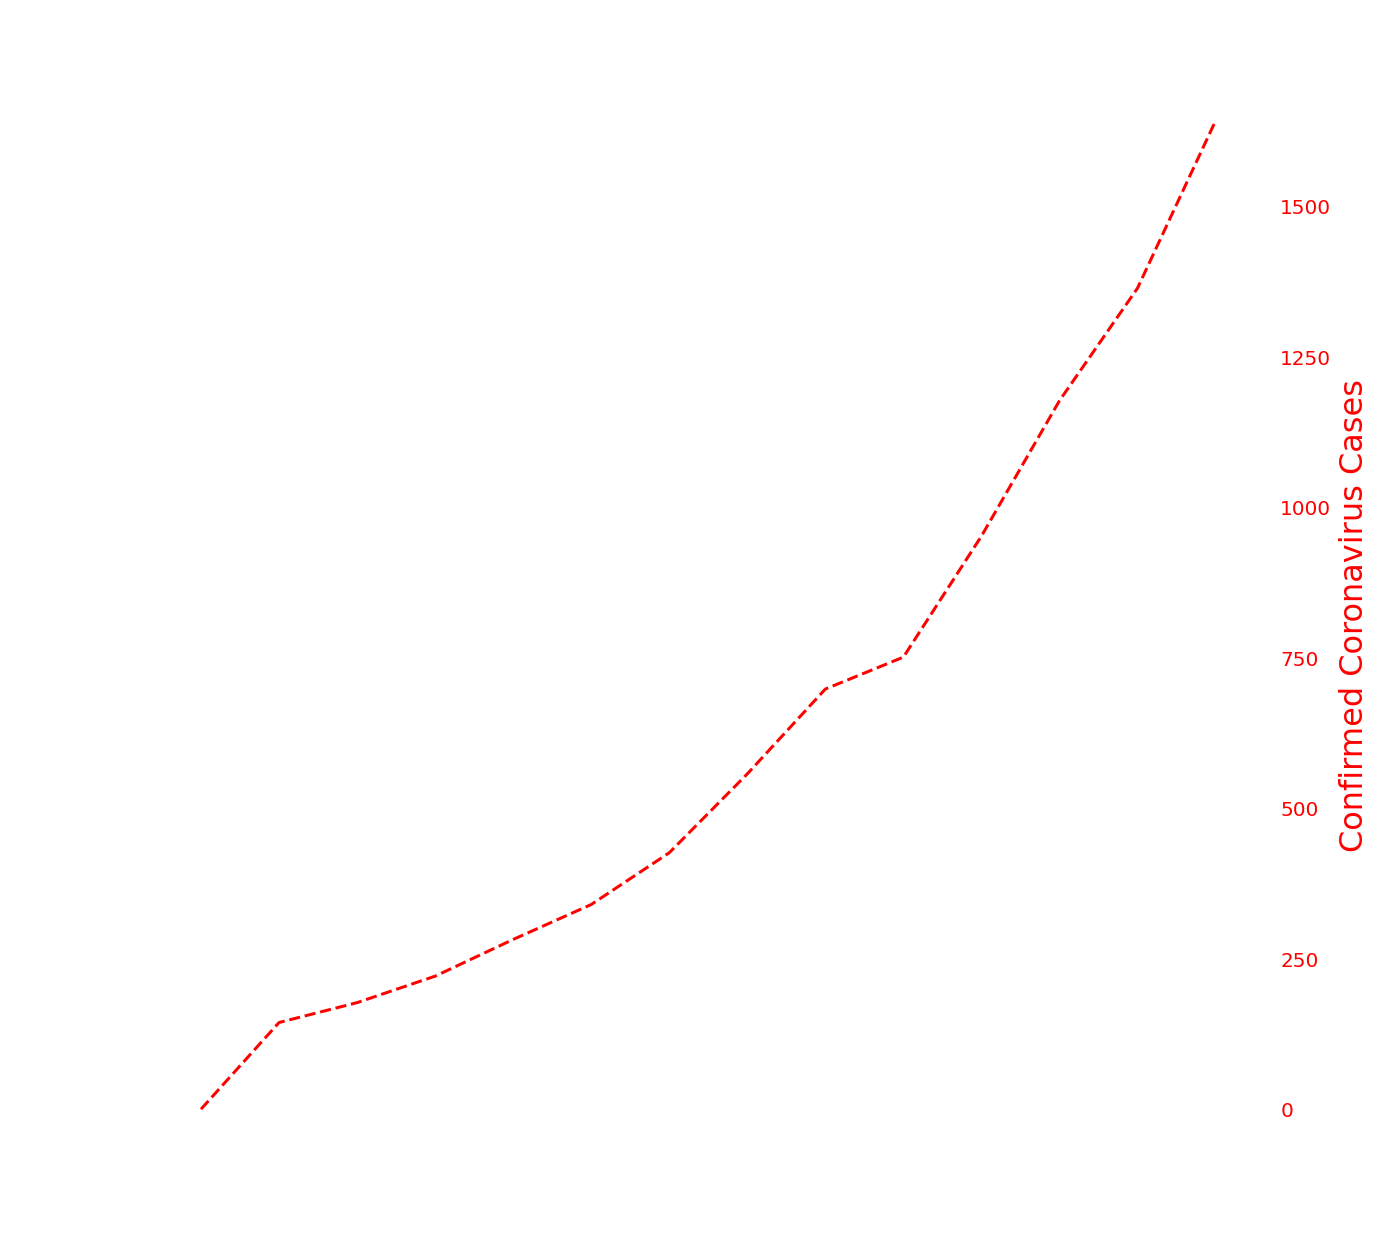

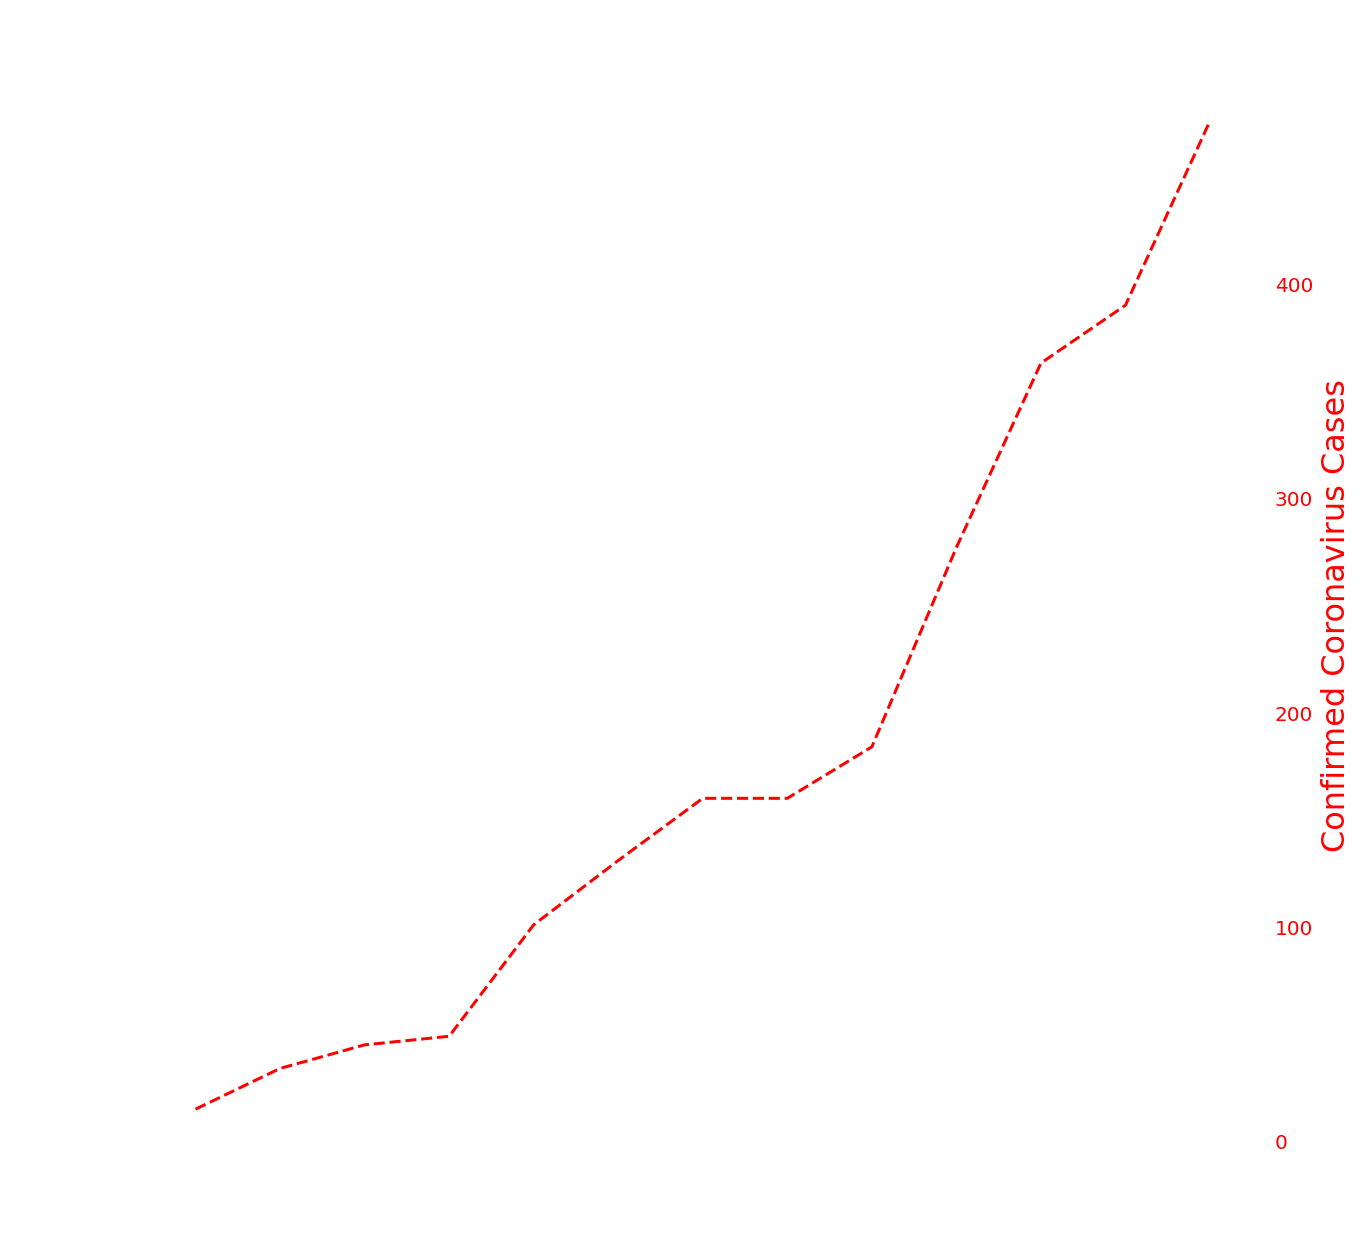

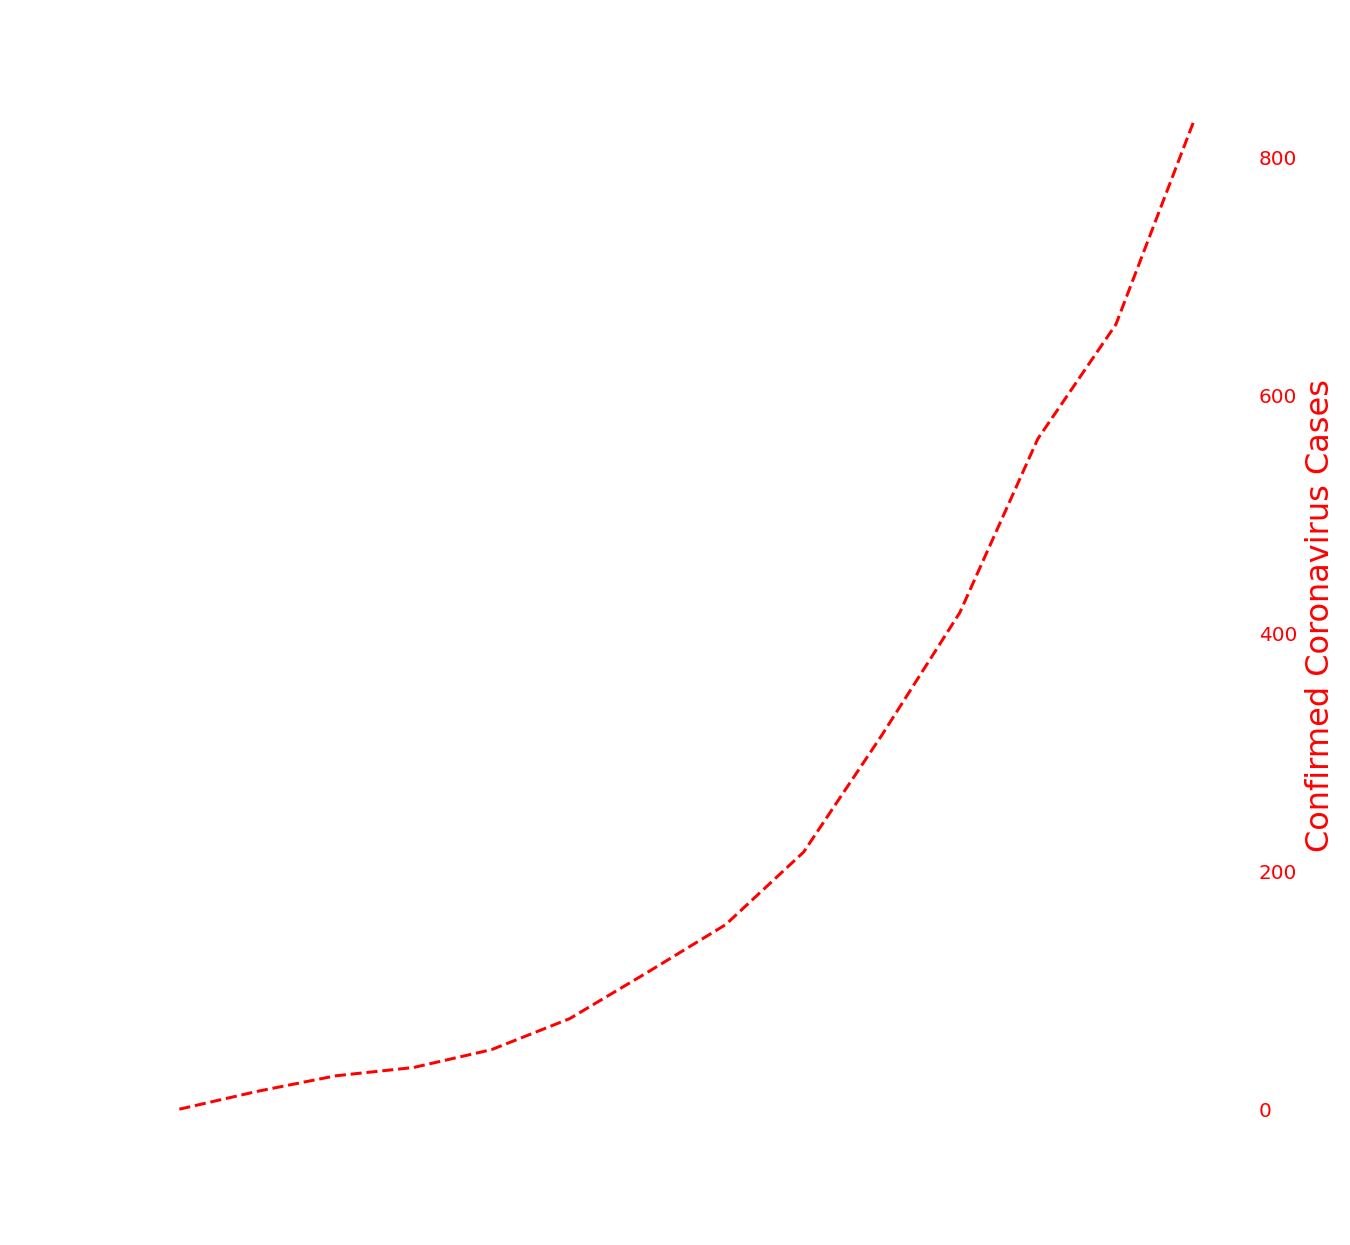

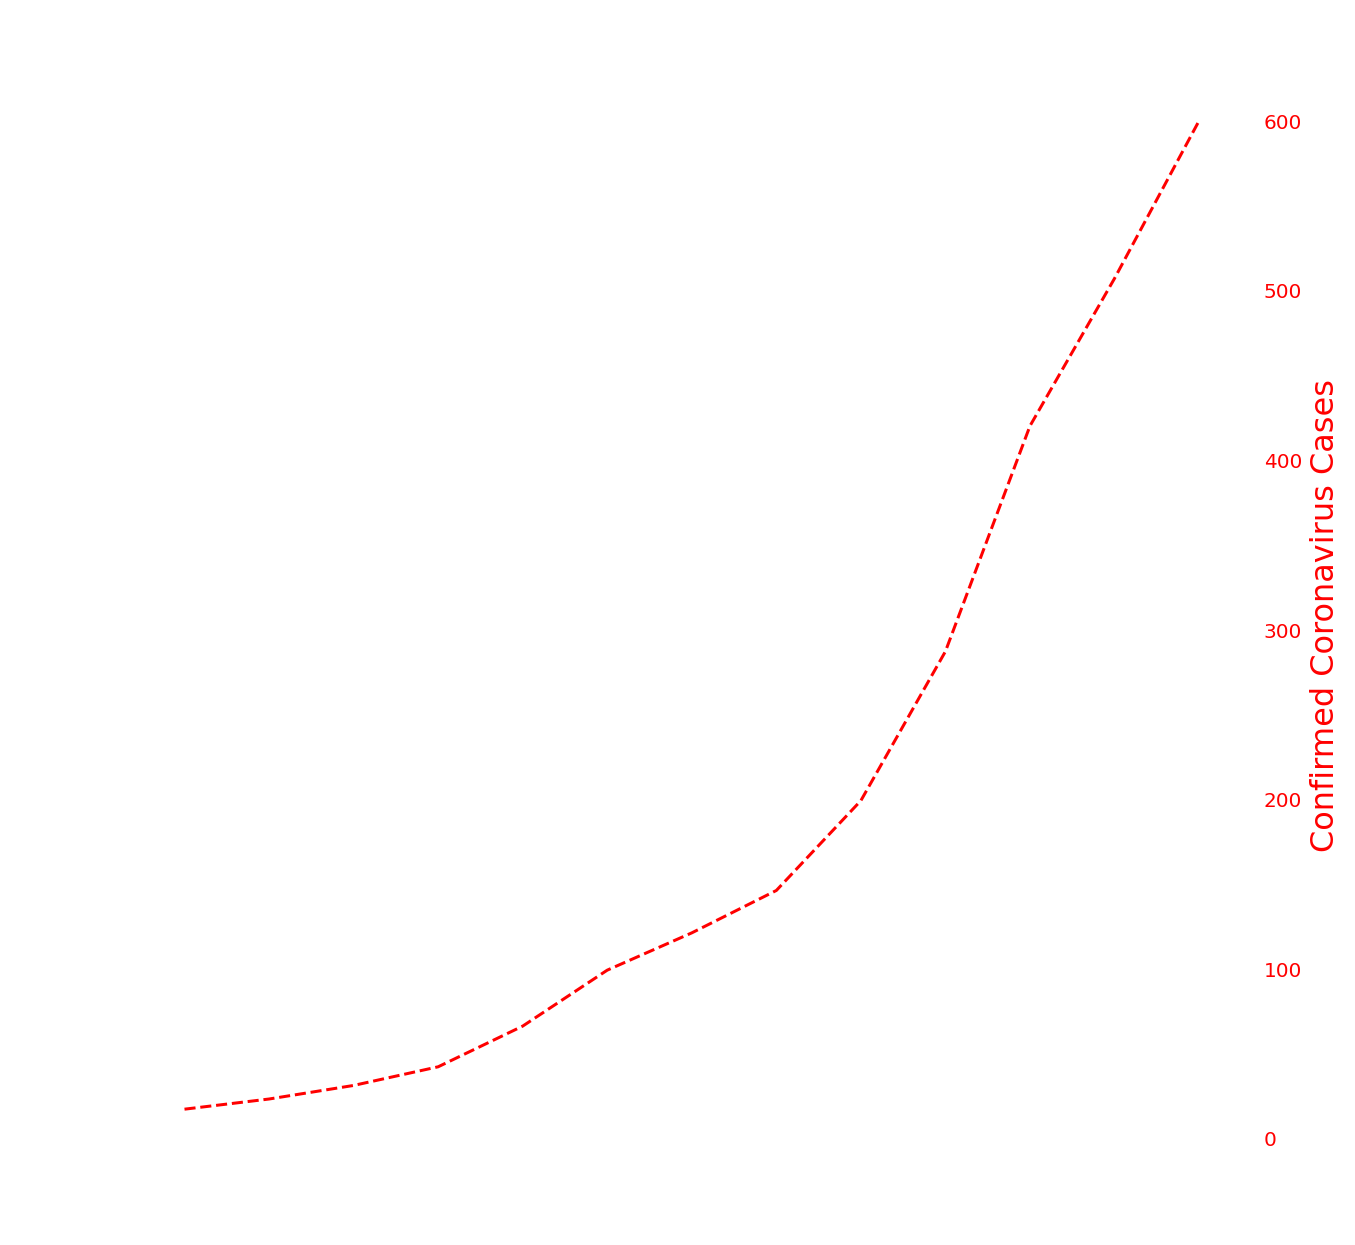

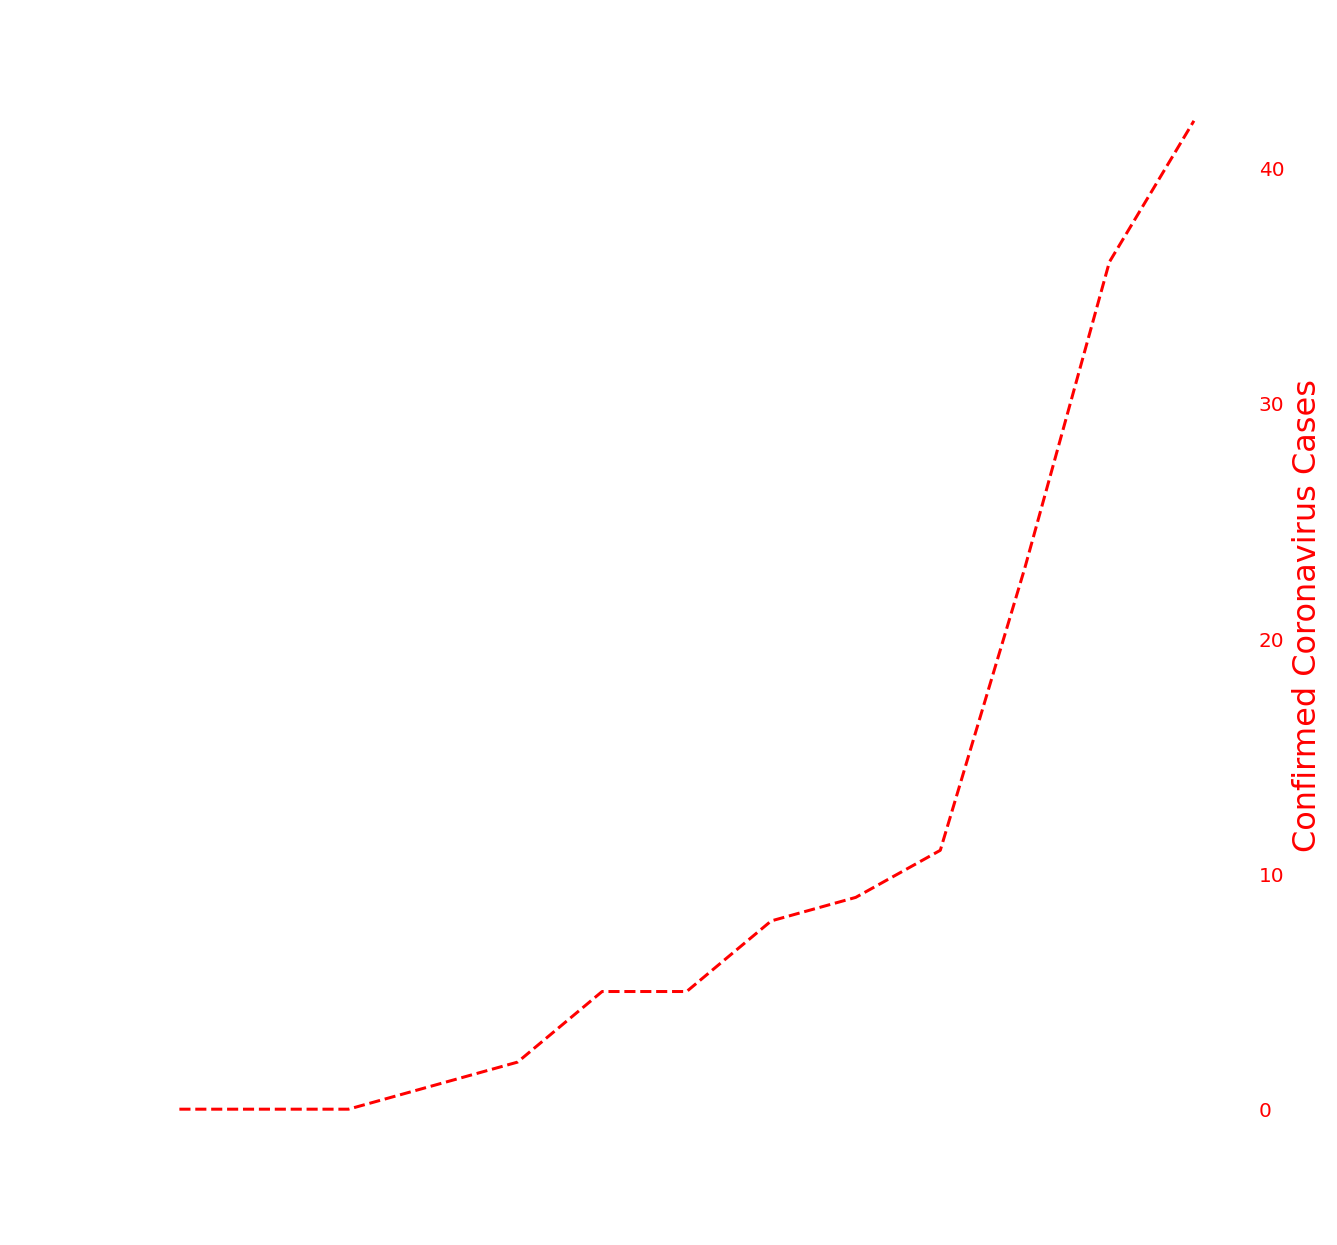

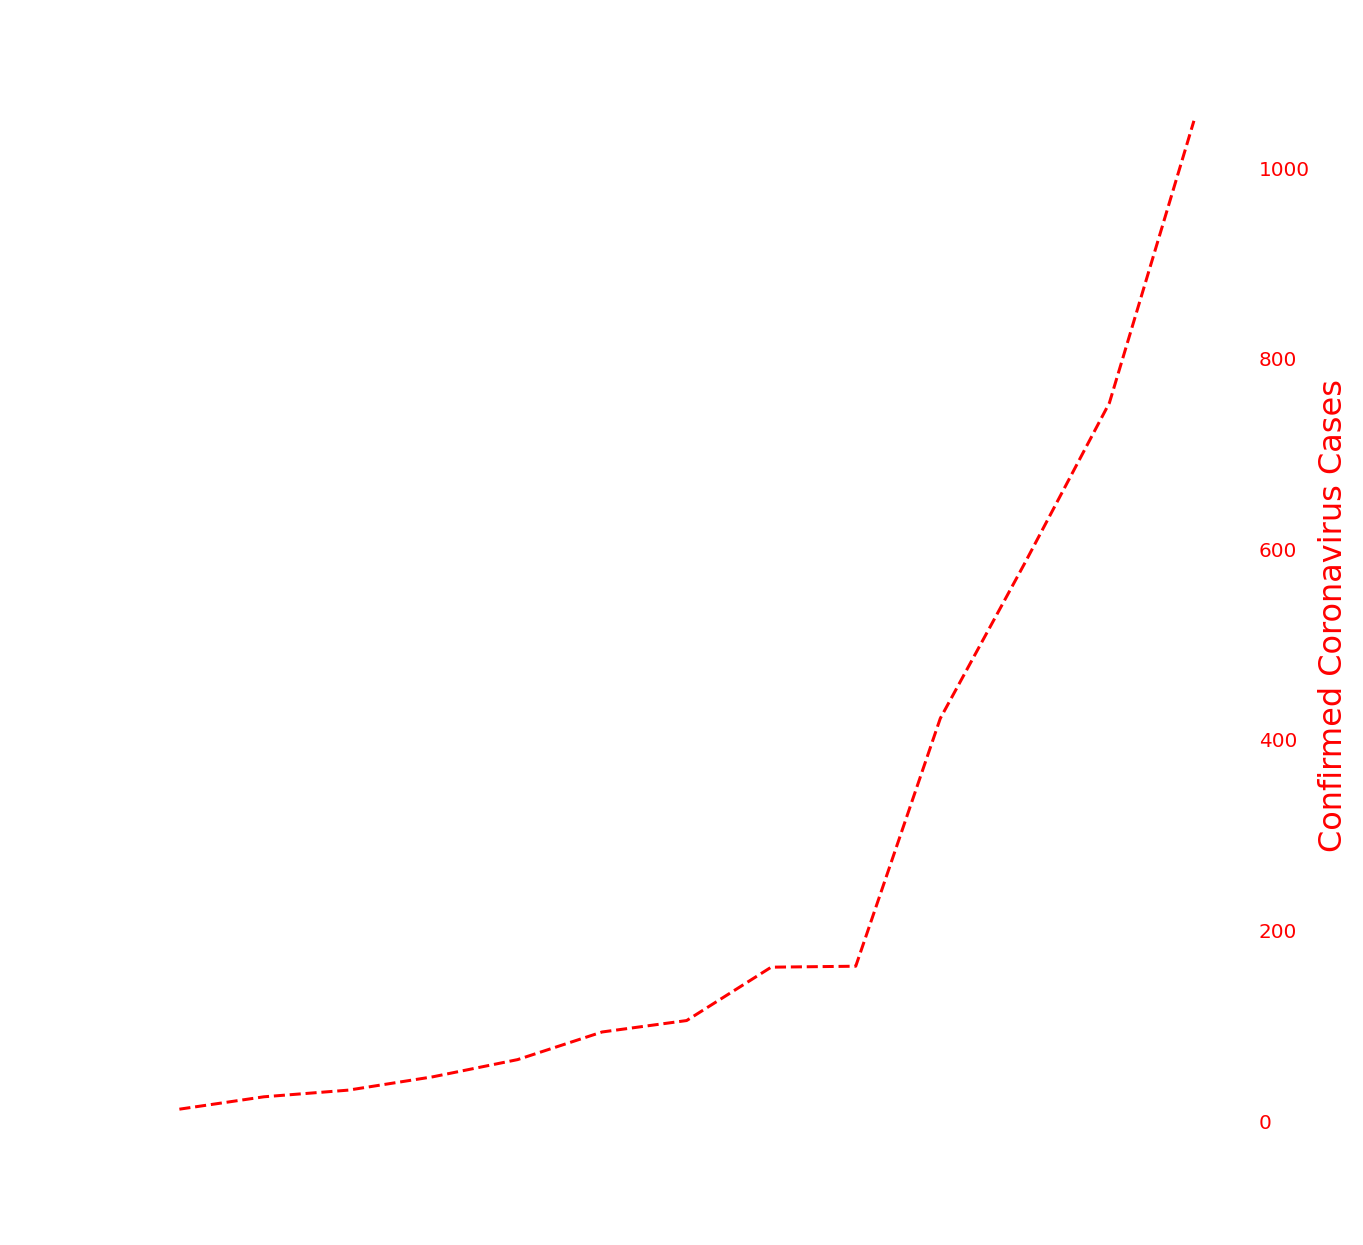

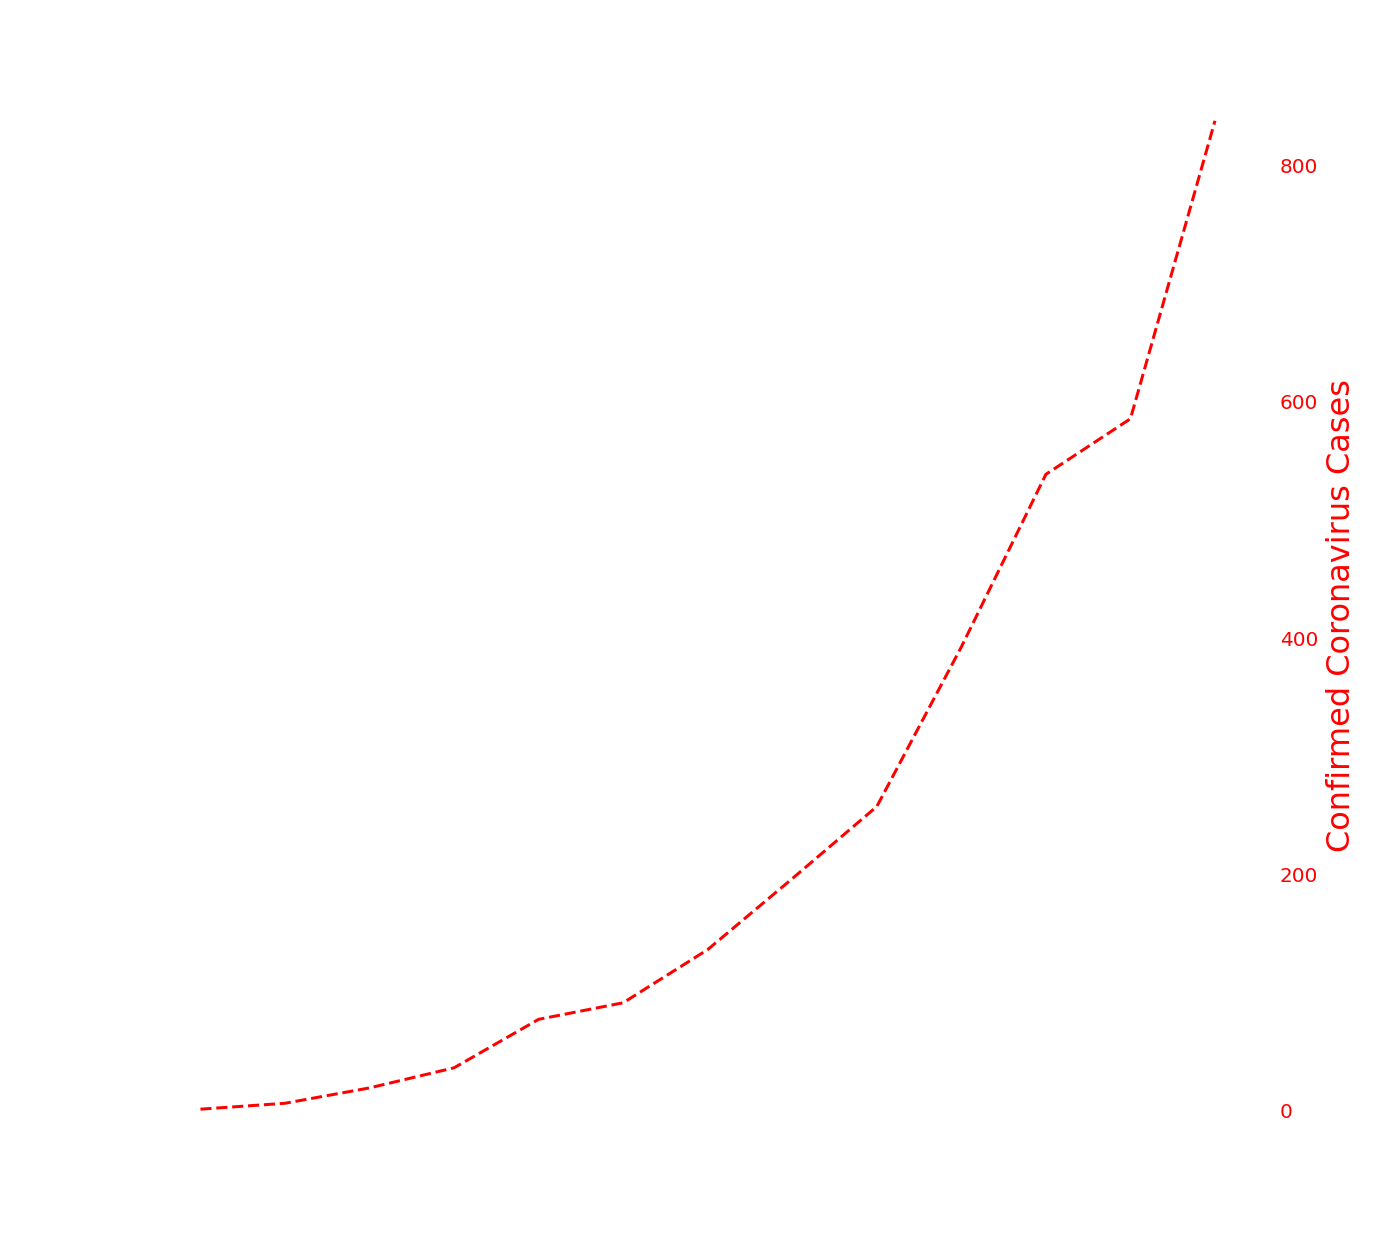

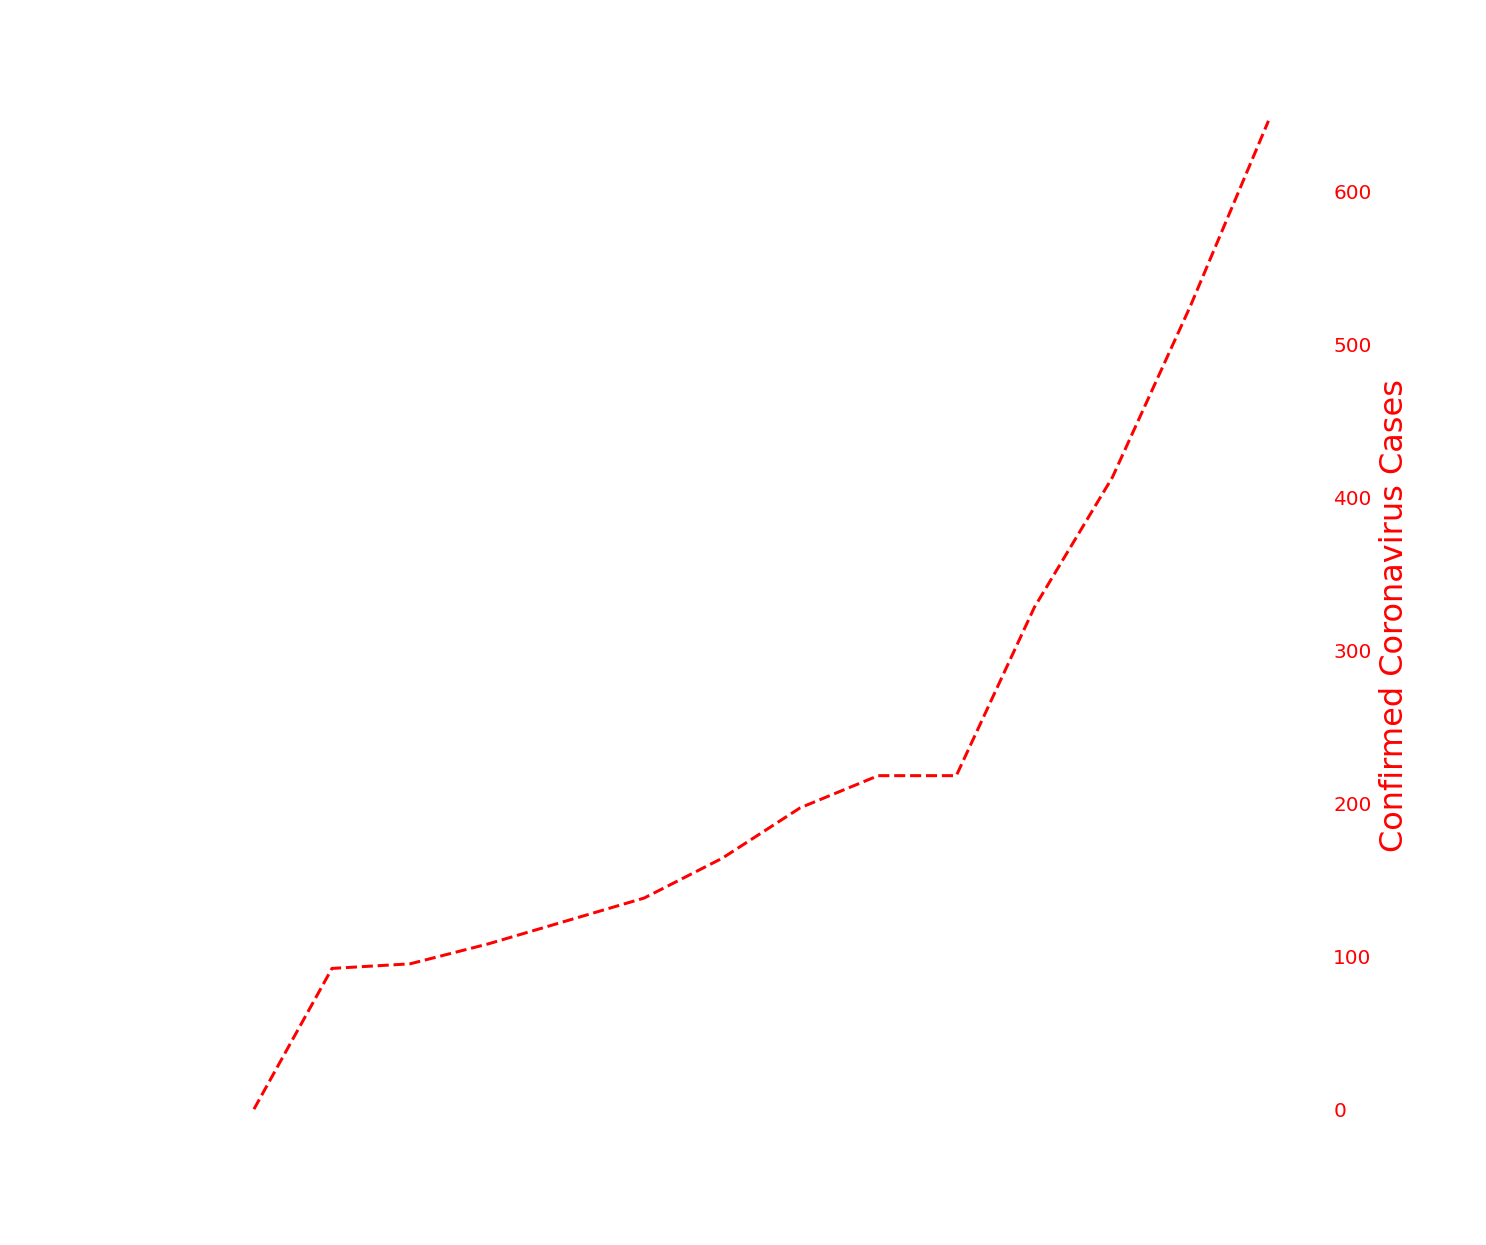

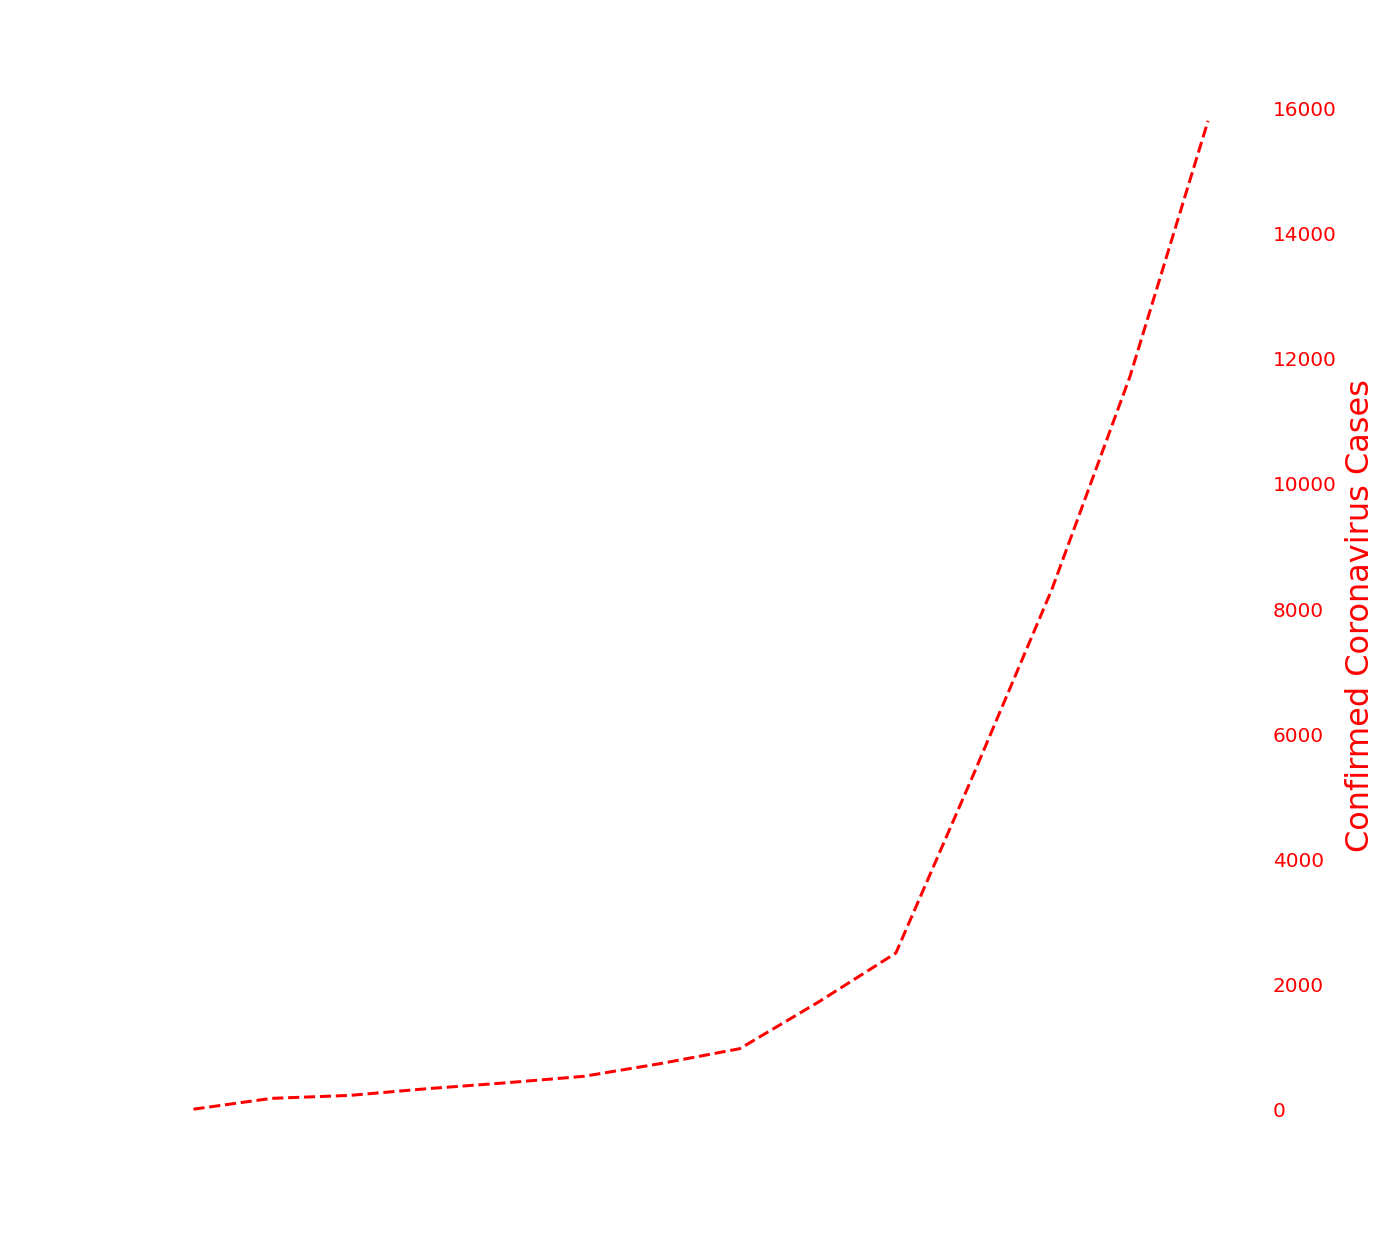

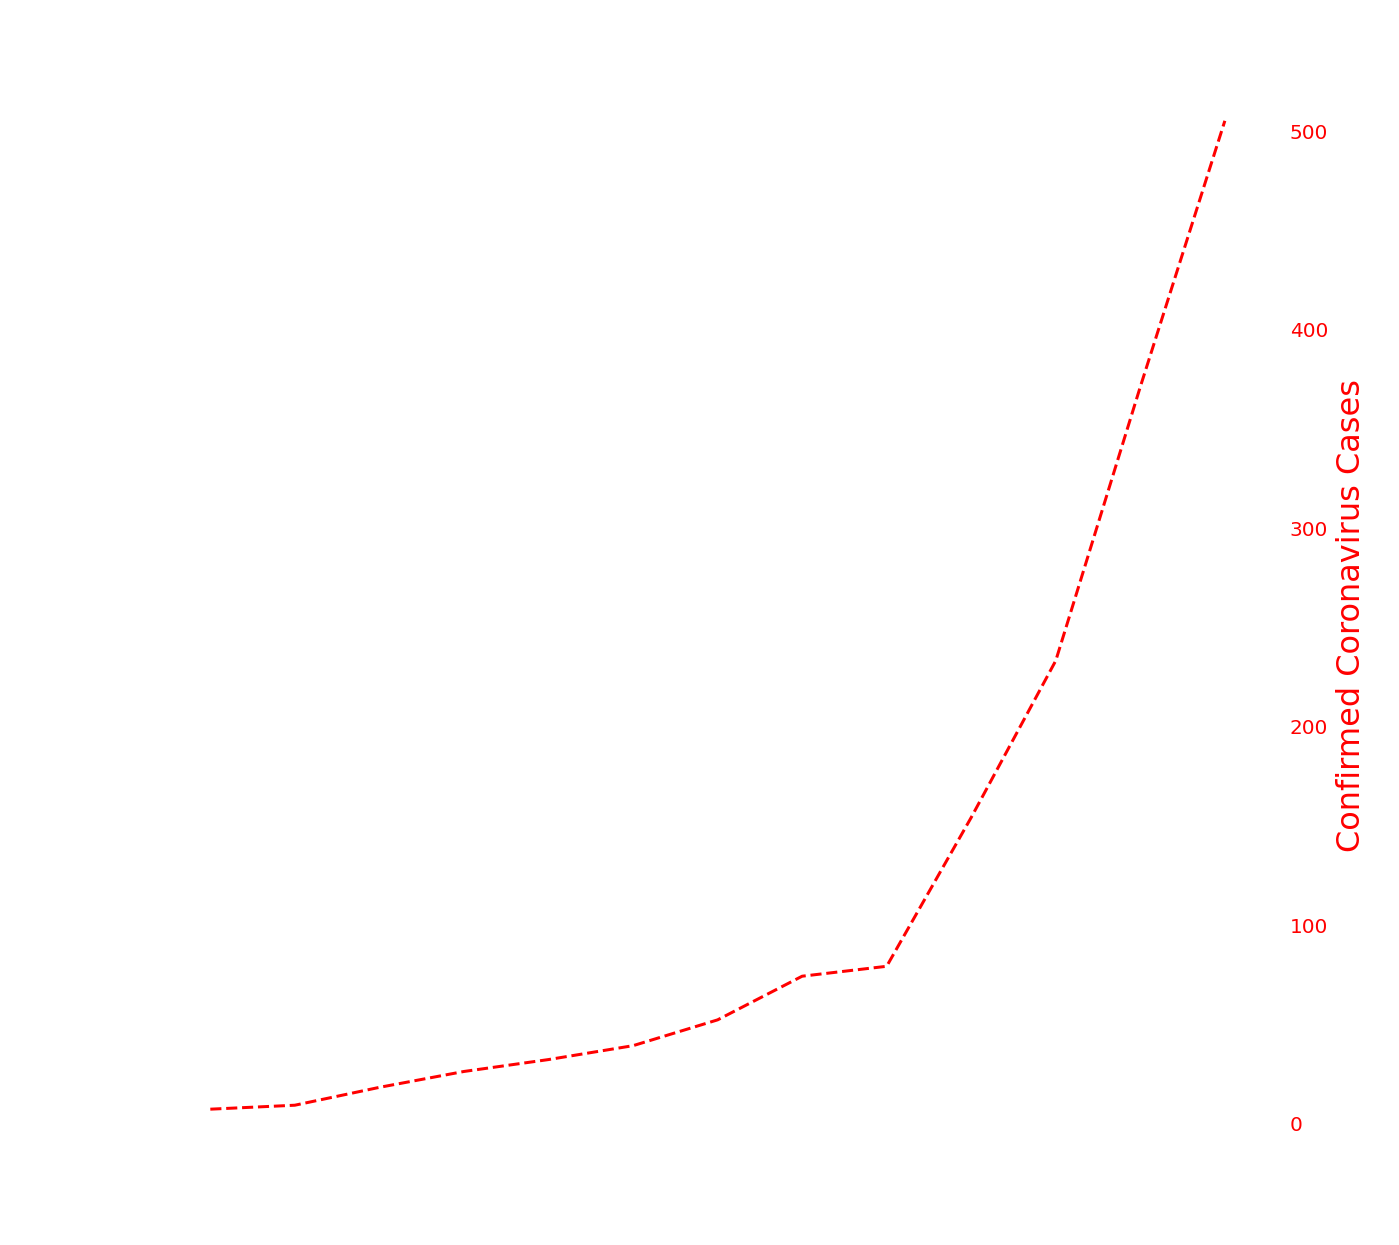

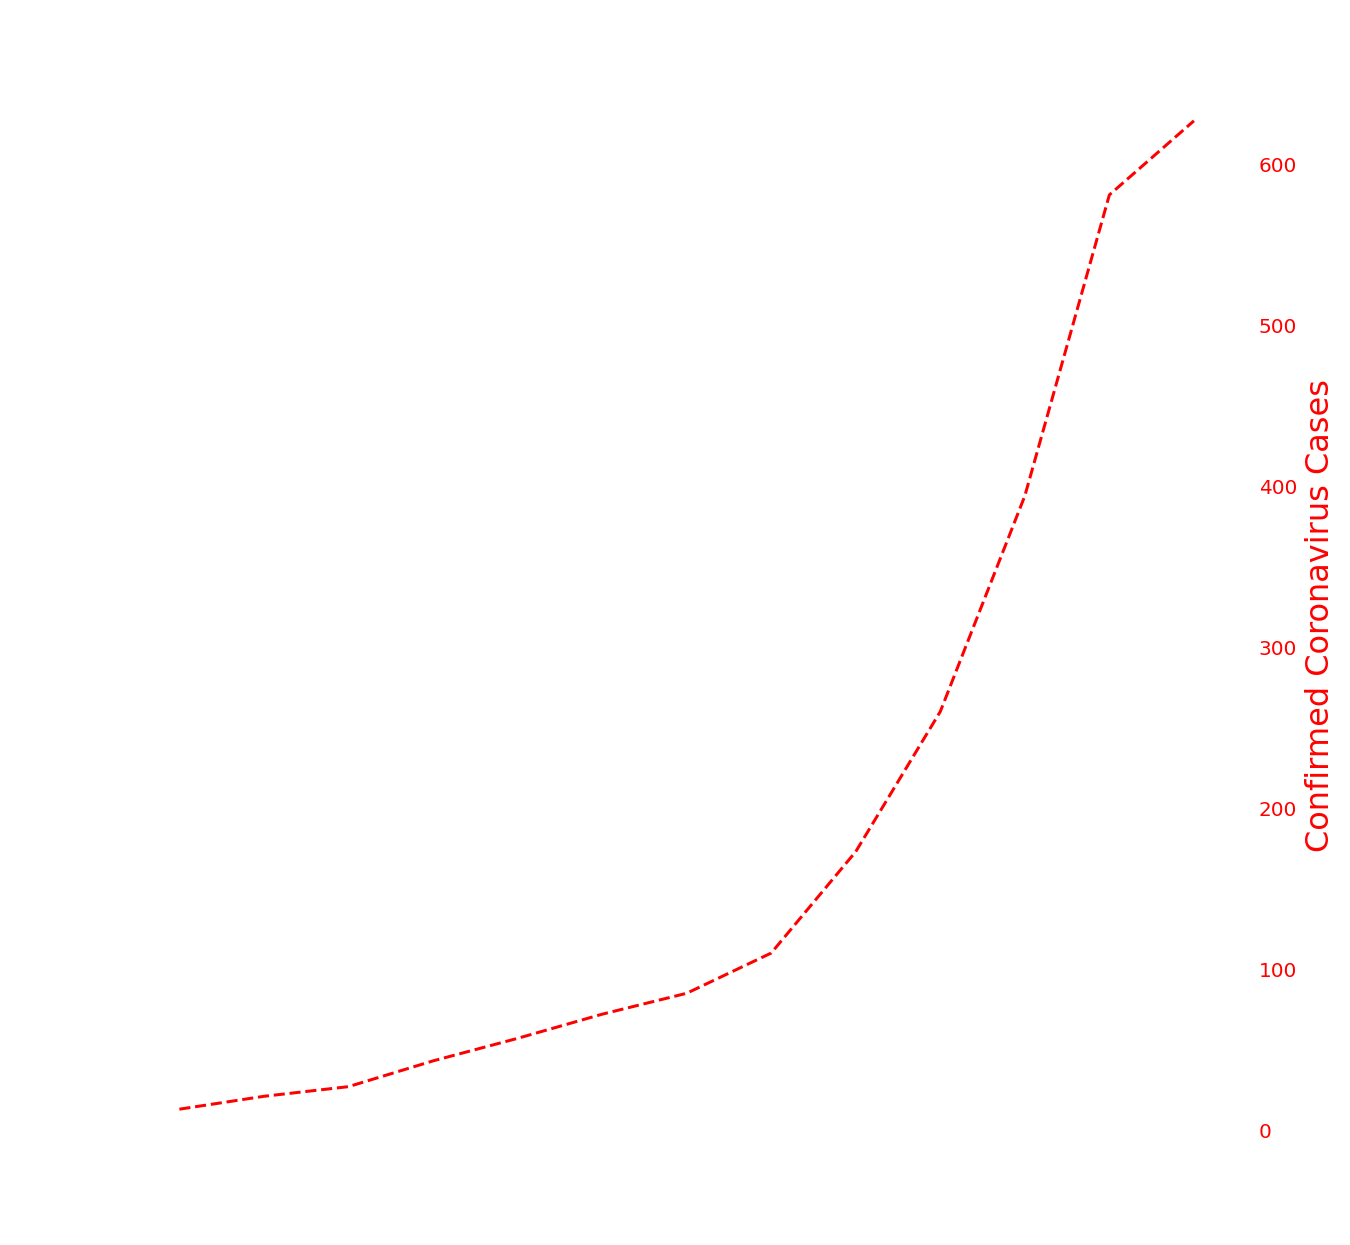

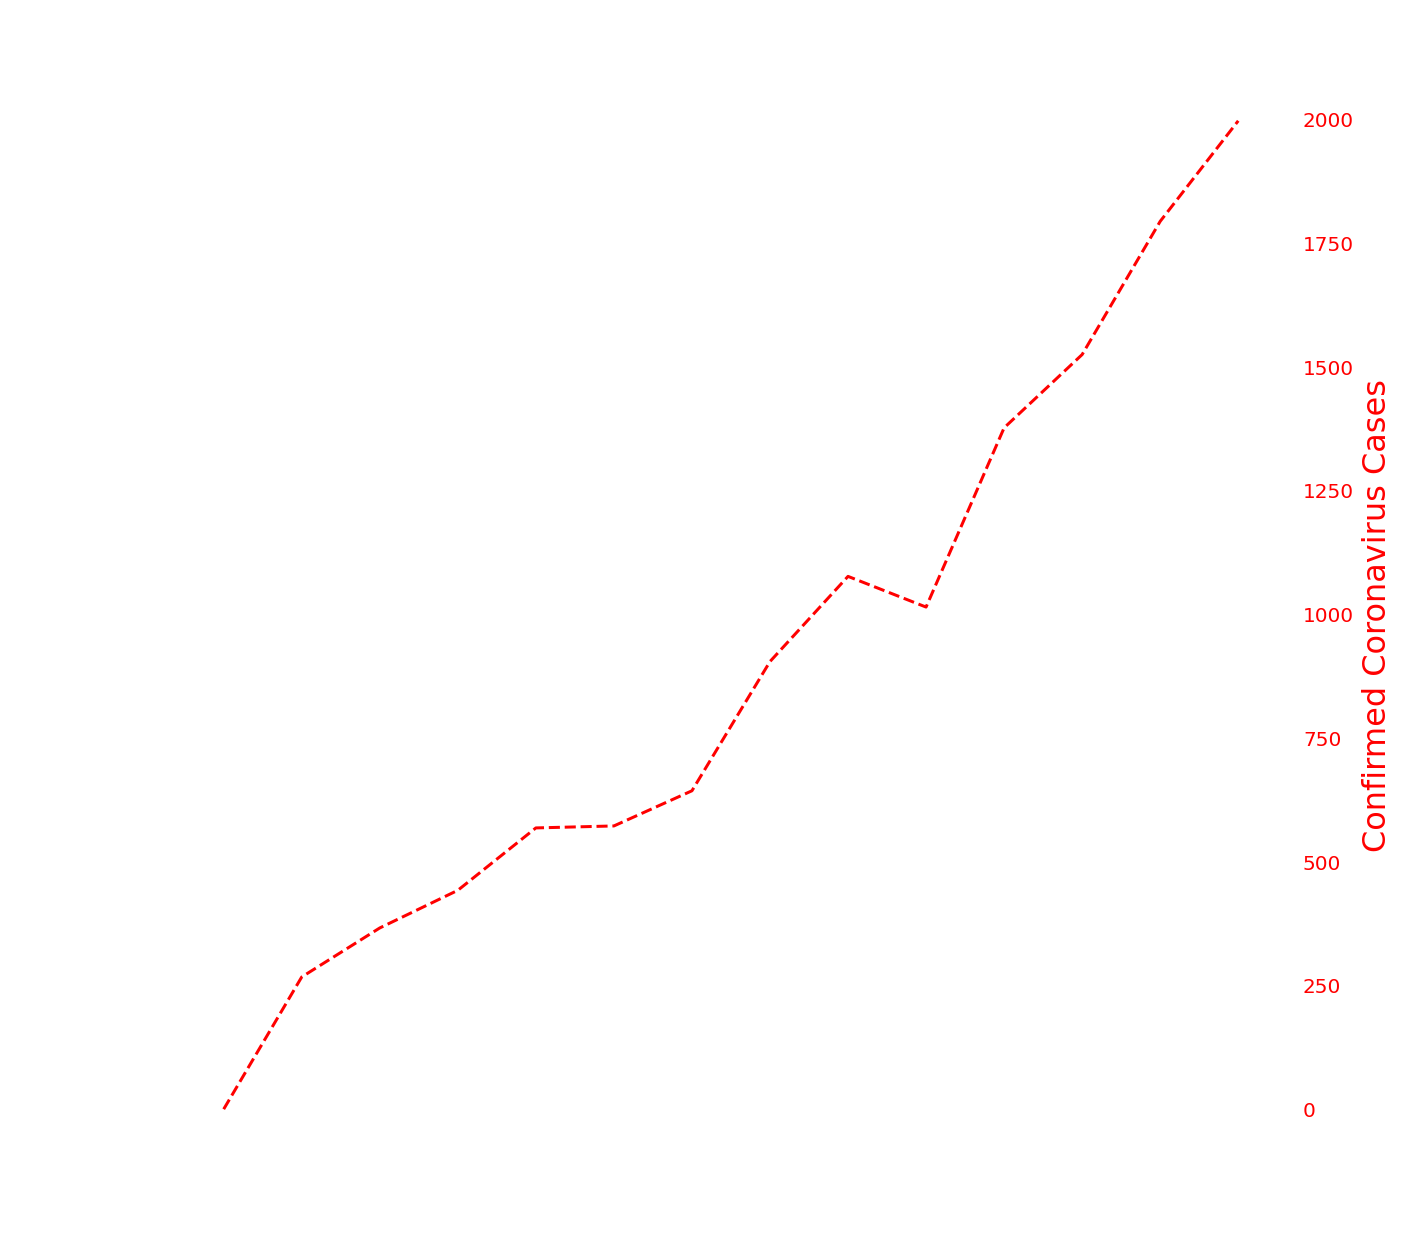

In [222]:
state_list = ['california', 'colorado', 'florida',
              'georgia', 'idaho', 'illinois',
              'louisiana', 'massachusetts', 'newyork',
              'tennessee', 'texas', 'washington']

for state in state_list:
    graphSentimentVsCases(state)

In [25]:
state = 'massachusetts'
state_topics = pickle.load(open(f'tweets/models/{state}/{state}_specific_topics.txt', 'rb'))
state_topics

{'topic0': ['charlie baker',
  'governor charlie',
  'sign petition',
  'shutdownmass minimize',
  'baker shutdownmass',
  'minimize sign',
  'gov charlie',
  'declares emergency',
  'baker declares',
  'emergency due',
  'press conference',
  'whole food',
  'jeff bezos',
  'soon gov',
  'eected soon',
  'food amp',
  'declared emergency',
  'give whole',
  'amp paid',
  'bezos give',
  'bezos bezos',
  'paid sign',
  'national guard',
  'enormous increase',
  'baker declared',
  'watch gov',
  'baker said',
  'demand immediately',
  'functional kit',
  'provided functional'],
 'topic1': ['patrick day',
  'day parade',
  'cancel patrick',
  'parade canceled',
  'amid concern',
  'amid fear',
  'parade cancelled',
  'parade amid',
  'parade postponed',
  'canceled amid',
  'parade due',
  'hartford patrick',
  'canceled due',
  'annual patrick',
  'abundance caution',
  'marty walsh',
  'saint patrick',
  'mayor marty',
  'cancelled due',
  'happy patrick',
  'postponed concern',
  'gr

In [170]:
df = pd.read_csv(f'tweets/tweets_processed/coronavirus_newyork_tweets_processed', engine = 'python')
df = df[df['created_at'] != '0.0'] # if a created_at timestamp is not properly done, twitter has 0.0 filled in
df['date'] = df['created_at'].apply(lambda x: datetime.strptime(x[:10], '%Y-%m-%d'))
dates = df.groupby(['date'])['sentiment'].mean().keys().tolist()
average_sentiment = df.groupby(['date'])['sentiment'].mean().tolist()

In [171]:
average_sentiment

[-0.04450297222859759,
 -0.04095814183345694,
 -0.02877920357044031,
 -0.03117722333397977,
 -0.007810991399678593,
 -0.004284797343557414,
 0.003914754846867187,
 0.005557176752796398,
 0.011168249340904424,
 -0.0014700892974738734,
 0.00018549819308206998,
 0.0012911283607744892,
 -0.002306137865911213,
 0.1252150257953558]

In [180]:
df[df['date'] == '2020-03-22'].iloc[4]['full_text']

"Look at New York State on this map. NY is America's Lombardy. https://t.co/Kq48hlOtW6"

In [232]:
country_cases = cases_df.groupby(['Country/Region']).sum()

In [237]:
us_cases = country_cases.loc['US']

In [247]:
us_dates = us_cases.keys()[-15:].tolist()

In [281]:
us_dates = [x[:-3] for x in us_dates]

In [248]:
us_cases = us_cases[-15:].tolist()

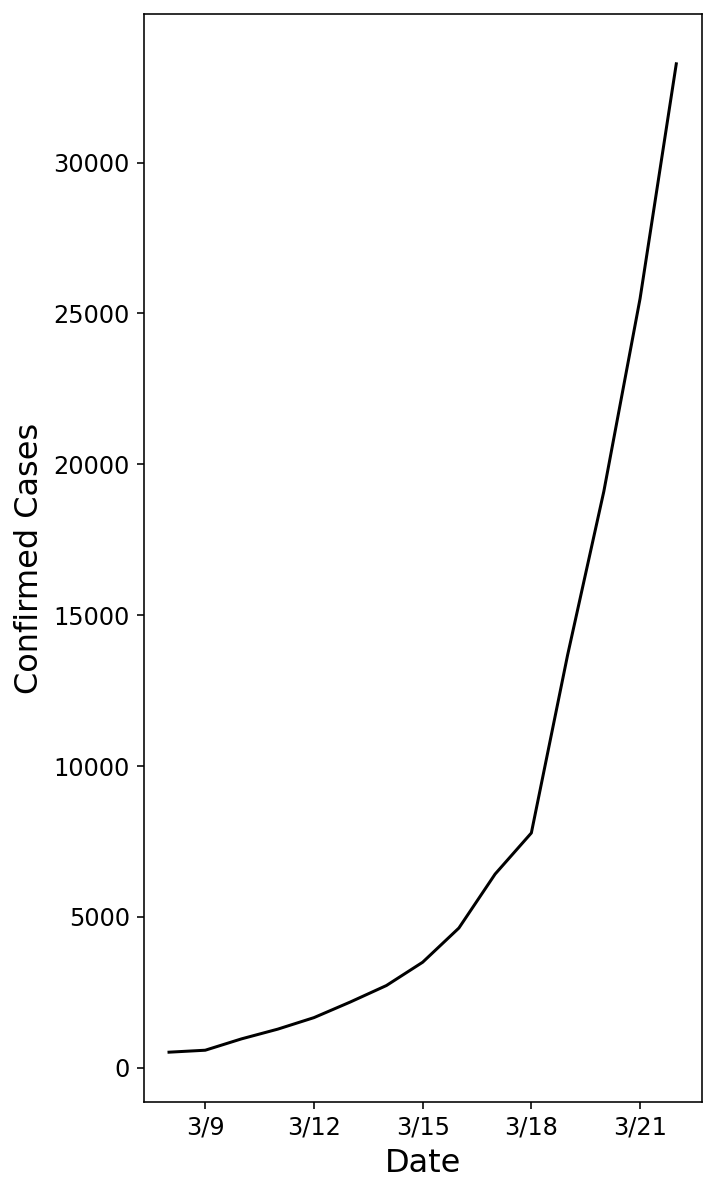

In [299]:
import numpy as np
c = 'k'
with plt.rc_context({'axes.edgecolor':c, 'xtick.color':c, 'ytick.color':c, 'figure.facecolor':'white'}):
    fig = plt.figure(figsize=(5,10))
    # fig.suptitle(f'United States Confirmed Coronavirus Cases', fontsize=20, y=0.92, color=c)
    ax1 = fig.add_subplot(111)
    ax1.plot(us_dates, us_cases, color=c)
    ax1.set_ylabel('Confirmed Cases', fontsize=16, color=c)
    ax1.set_xlabel('Date', fontsize=16, color=c)
    # ax1.set_xticklabels(us_dates,fontsize=12)  
    ax1.set_xticks(np.arange(1,15, 3.0))
    ax1.tick_params(axis="both", labelsize=12)
    
# plt.savefig(f'tweets/images/us_cases.png', transparent=True, bbox_inches='tight')

In [286]:
import pprint
pp = pprint.PrettyPrinter(compact = True)

In [342]:
def graphTopicSentiment(state, common=True, topics=[]):
    if common:
        doc_topic_nmf = pickle.load(open(f'tweets/models/{state}/{state}_common_doctopic.pkl', 'rb'))
    else: 
        doc_topic_nmf = pickle.load(open(f'tweets/models/{state}/{state}_specific_topics.pkl', 'rb'))
        
    df = pd.read_csv(f'tweets/tweets_processed/coronavirus_{state}_tweets_processed', engine = 'python')
    best_topic_nmf = [x.argmax() for x in doc_topic_nmf]
    df['topic'] = best_topic_nmf
    
    df = df[df['created_at'] != '0.0'] # if a created_at timestamp is not properly done, twitter has 0.0 filled in
    df['date'] = df['created_at'].apply(lambda x: datetime.strptime(x[:10], '%Y-%m-%d') if type(x) == str else '0.0')
    df = df[df['date'] != '0.0'] # if a created_at timestamp is not properly done, twitter has 0.0 filled in

    date_topic_df = pd.DataFrame(df.groupby(['date', 'topic'])['sentiment'].mean()).reset_index()
    date_topic_pivot = date_topic_df.pivot(index = 'date', columns='topic', values='sentiment')
    
    if common:
        state_topics = pickle.load(open(f'tweets/models/{state}/{state}_common_topics.txt', 'rb'))
    else: 
        state_topics = pickle.load(open(f'tweets/models/{state}/{state}_specific_topics.txt', 'rb'))
    
    dates = [x.strftime('%Y/%m/%d %H:%M:%S')[5:10] for x in date_topic_pivot[0].keys().tolist()] 
    topic_sentiments = [date_topic_pivot[x] for x in range(5)]
    
    c = 'w'
    cm = plt.cm.Pastel1(range(0,5))
    plt.style.use('default')
    
    with plt.rc_context({'axes.edgecolor':c, 'xtick.color':c, 'ytick.color':c, 'figure.facecolor':'white'}):
        fig = plt.figure(figsize=(10,10))
        # fig.suptitle(f'United States Confirmed Coronavirus Cases', fontsize=20, y=0.92, color=c)
        ax1 = fig.add_subplot(111)
        
        for i, sentiment in enumerate(topic_sentiments):
            if len(topics) > 0:
                ax1.plot(dates, sentiment, label=topics[i], color=cm[i])
            else:
                ax1.plot(dates, sentiment, label=f'Topic {i}', color=cm[i])
        # ax1.plot(dates, us_cases, color=c)
        ax1.set_ylabel('Average Sentiment', fontsize=16, color=c)
        ax1.set_xlabel('Date', fontsize=16, color=c)
        # ax1.set_xticklabels(us_dates,fontsize=12)  
        ax1.set_xticks(np.arange(1,15, 3.0))
        ax1.tick_params(axis="both", labelsize=12)
        
        ax1.legend()
        
    pp.pprint(state_topics)
    plt.savefig(f'tweets/images/{state}_topicsentiment.png', transparent=True, bbox_inches='tight')
    # date_topic_pivot.plot()

{'topic0': ['united state', 'state case', 'across united', 'donald trump',
            'case united', 'york time', 'state death', 'president trump',
            'state response', 'death toll', 'travel ban', 'state via',
            'via nyt', 'state economy', 'people united', 'travel europe',
            'president donald', 'confirmed case', 'state health',
            'europe united', 'spread united', 'state testing',
            'president united', 'state airport', 'public health',
            'health official', 'update united', 'washington post', 'sick leave',
            'state stock'],
 'topic1': ['ron desantis', 'sign petition', 'petition via', 'governor ron',
            'rent mortgage', 'suspend rent', 'amp utility', 'mortgage amp',
            'utility payment', 'desantis suspend', 'governor governor',
            'payment sign', 'gov ron', 'outbreak sign', 'ivy league',
            'year eligibility', 'eligibility outbreak', 'ncaa allow',
            'league studentathletes',

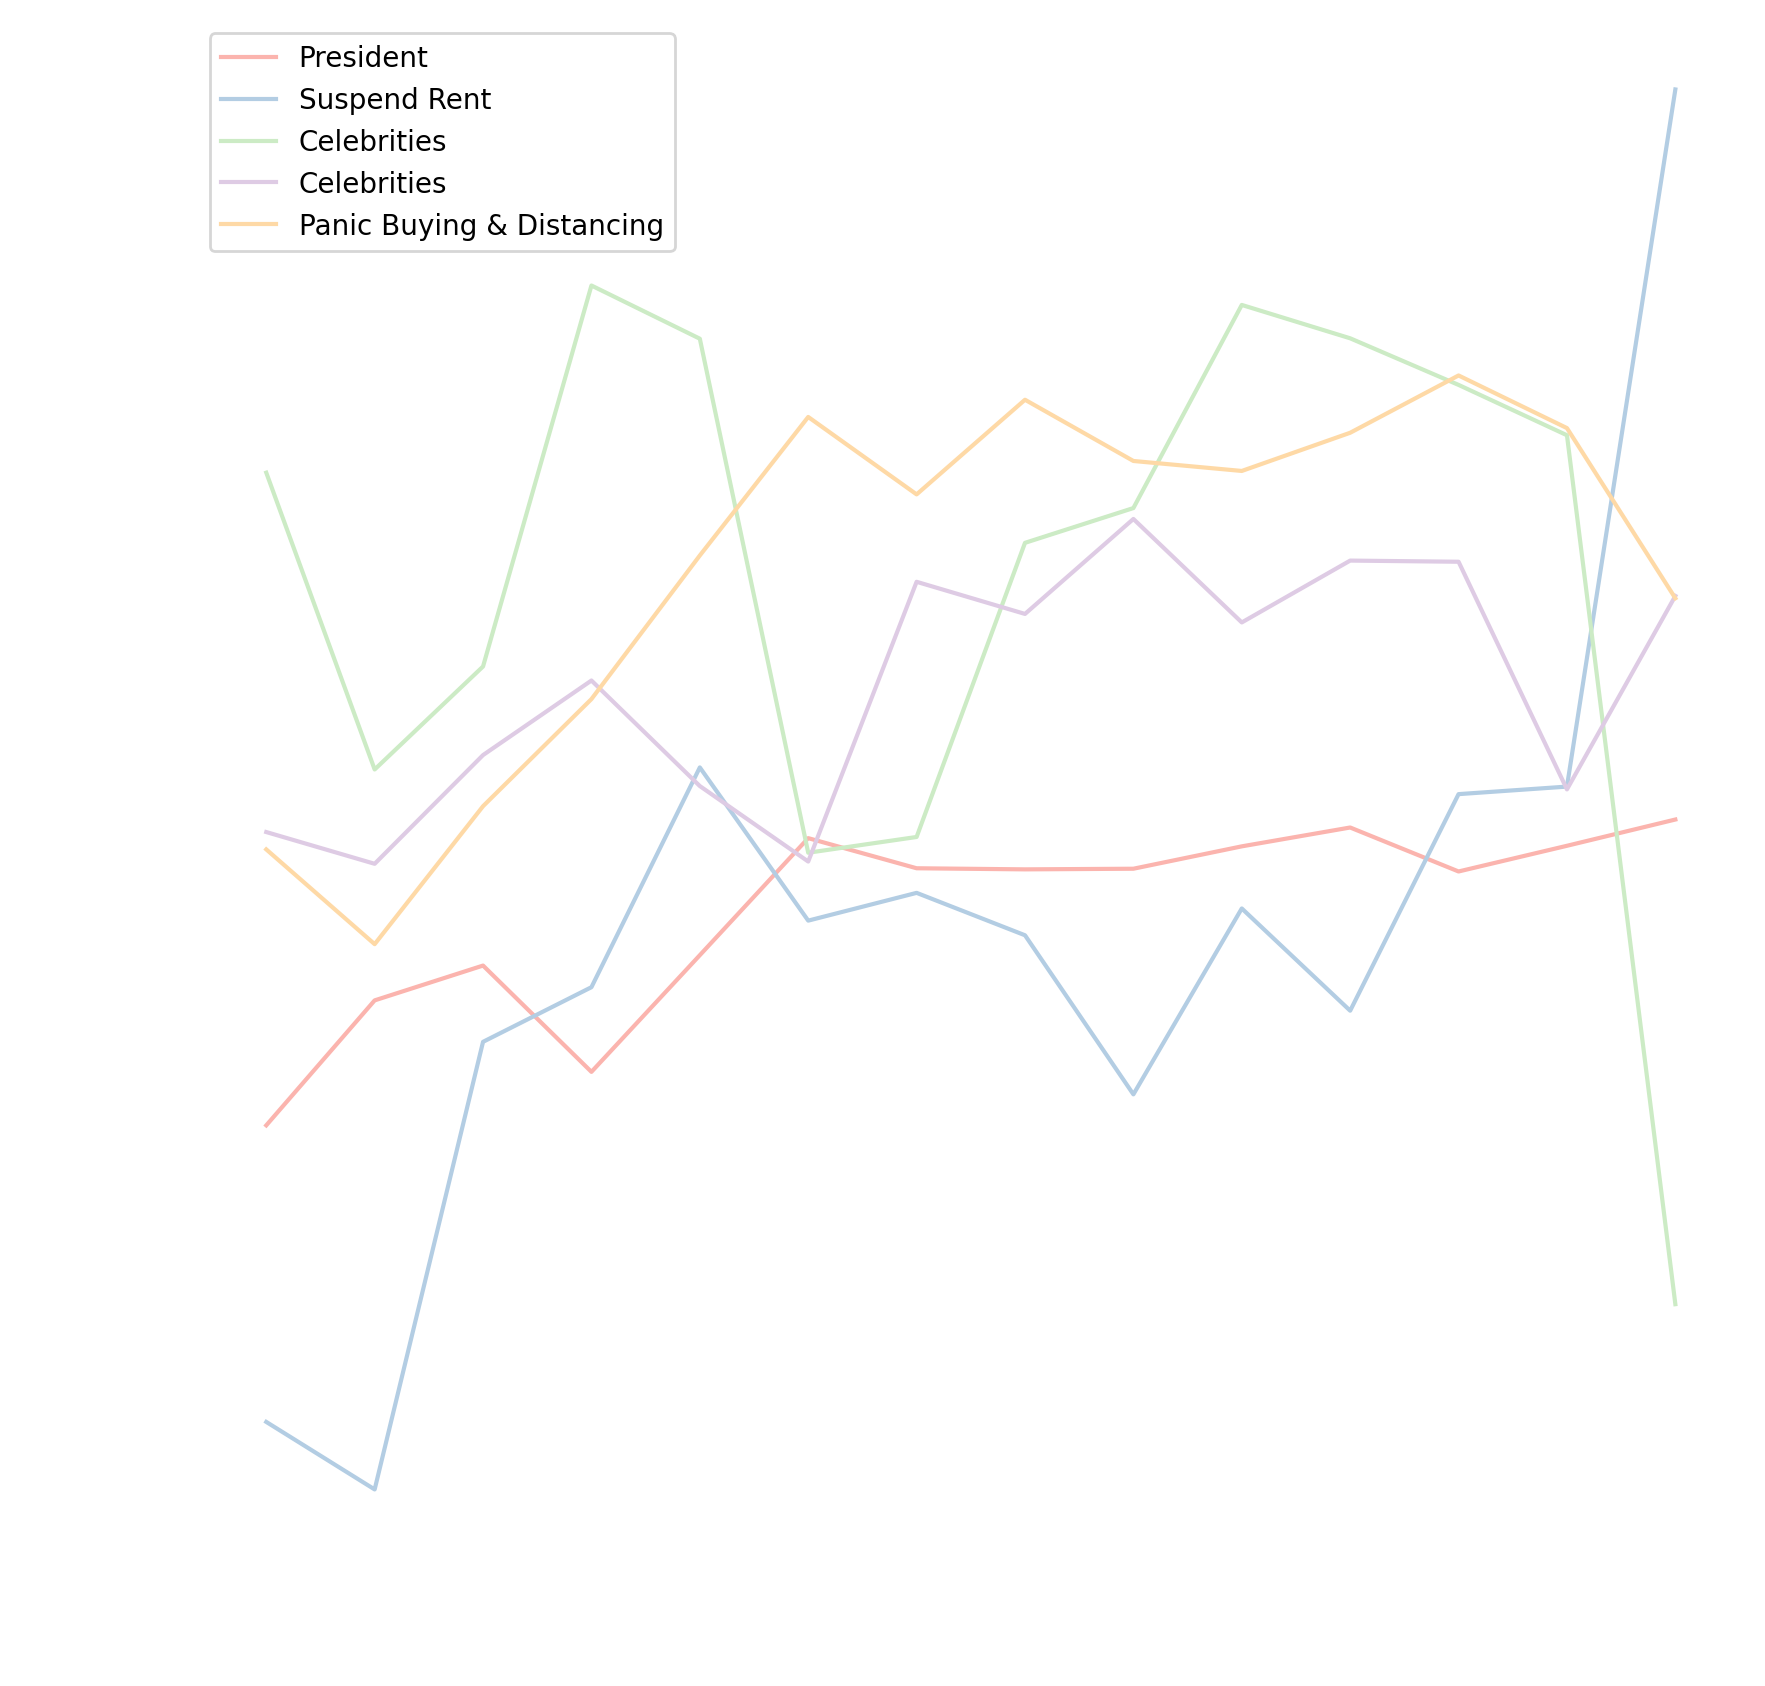

In [343]:
florida_topics = ['President', 'Suspend Rent', 'Celebrities', 'Celebrities', 'Panic Buying & Distancing']
graphTopicSentiment('florida', common=True, topics=florida_topics)

{'topic0': ['united state', 'state case', 'case united', 'across united',
            'state response', 'york time', 'confirmed case', 'donald trump',
            'president trump', 'state economy', 'state government', 'state via',
            'back united', 'state testing', 'delay testing', 'testing set',
            'set back', 'younger adult', 'state stock', 'everywhere already',
            'already delay', 'update united', 'hospitalization united',
            'travel ban', 'public health', 'travel europe', 'state health',
            'people united', 'spread united', 'president donald'],
 'topic1': ['stay home', 'home stay', 'home order', 'gavin newsom', 'gov gavin',
            'wash hand', 'resident stay', 'people stay', 'californian stay',
            'please stay', 'stay safe', 'ordered stay', 'newsom order',
            'stop spread', 'home avoid', 'order californian', 'statewide stay',
            'million people', 'home except', 'public health', 'order resident',
         

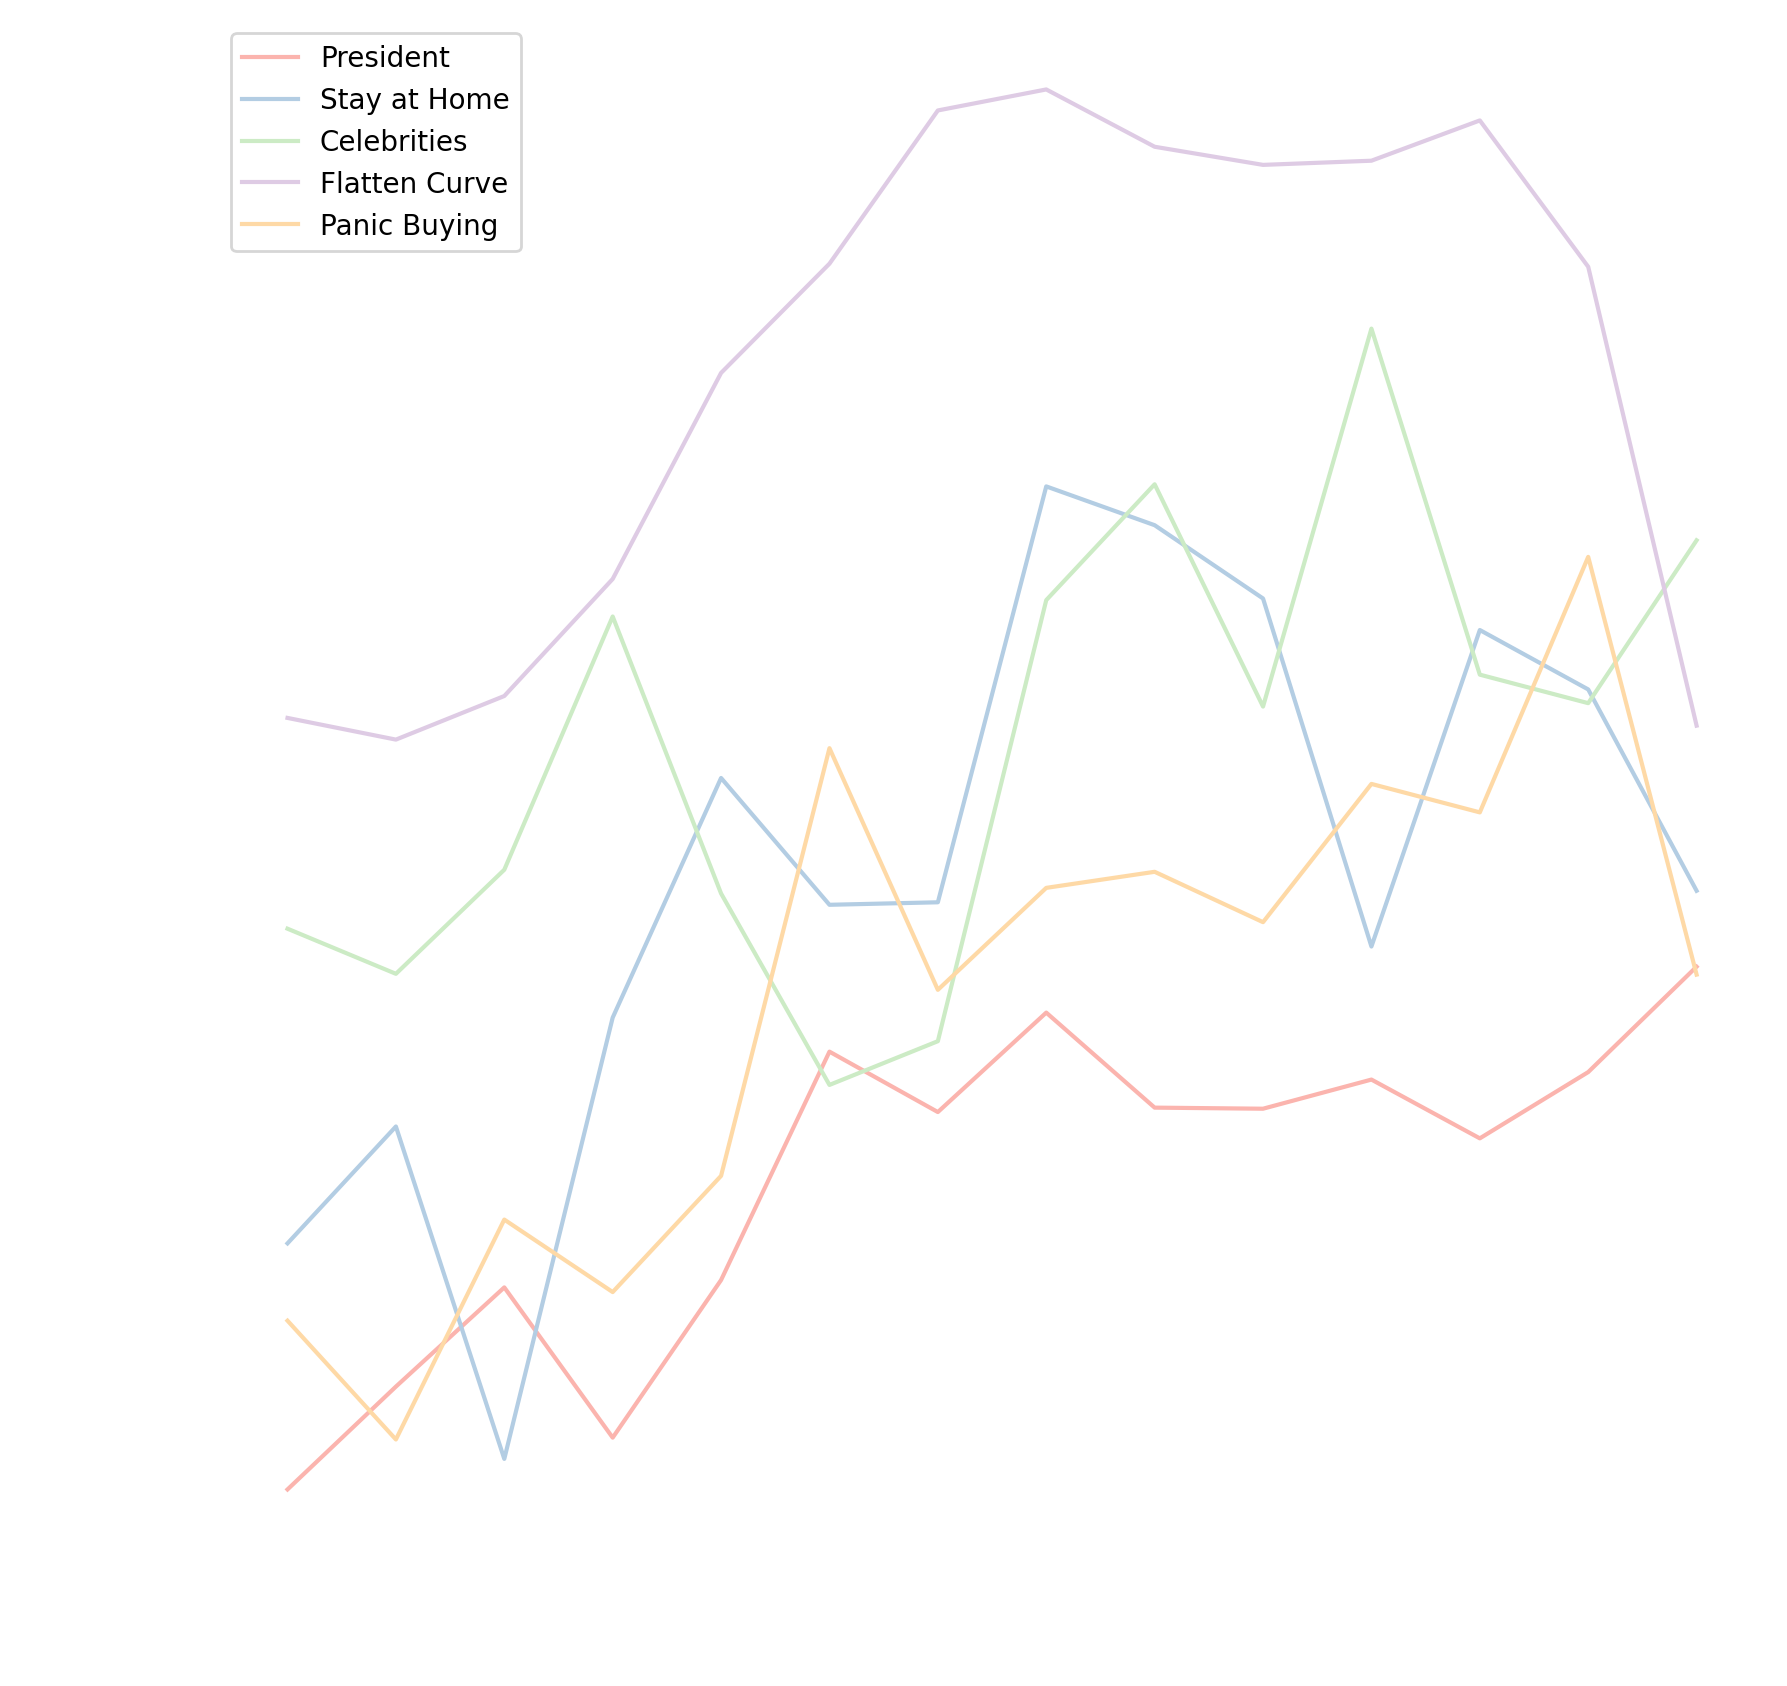

In [344]:
california_topics = ['President', 'Stay at Home', 'Celebrities', 'Flatten Curve', 'Panic Buying']
graphTopicSentiment('california', common=True, topics=california_topics)

{'topic0': ['comprehensive guide', 'scientific information', 'historical data',
            'data report', 'dispels myth', 'guide based', 'guide book',
            'fallacy amp', 'myth fallacy', 'truth supported', 'amp propaganda',
            'amp historical', 'curated scientific', 'supported science',
            'full truth', 'information dispels', 'propaganda novel', 'math amp',
            'science math', 'novel full', 'based curated', 'book comprehensive',
            'pet safe', 'truth mask', 'wan know', 'know make', 'survive wave',
            'learn survive', 'time around', 'read book'],
 'topic1': ['united state', 'president trump', 'case united', 'live update',
            'across united', 'state death', 'state response', 'state case',
            'york time', 'state health', 'back united', 'state government',
            'washington post', 'spread united', 'state via', 'update united',
            'health official', 'official say', 'set back', 'delay testing',
            '

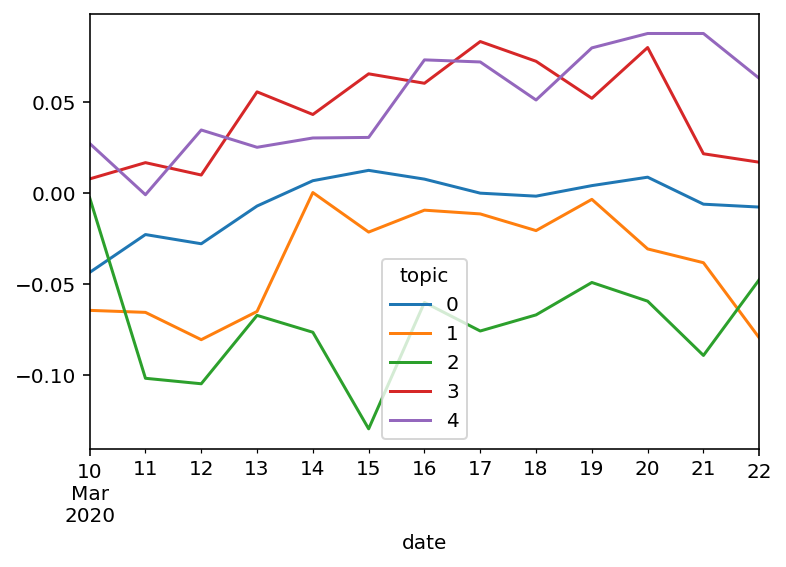

In [298]:
graphTopicSentiment('tennessee', common=True)